<a href="https://colab.research.google.com/github/rtajeong/M3_new_2025/blob/main/gg_31_linear_regression_ridge_lasso_rev2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Linear Regression model (without Regularization)
* n_features - number of features to be considered
* noise - deviation from straight line
* n_samples - number of samples

In [2]:
from sklearn.datasets import make_regression
X,y = make_regression(n_features=1, noise=10, n_samples=1000, random_state=42)

In [3]:
X[:5], y[:5]

(array([[-1.75873949],
        [ 1.03184454],
        [-0.48760622],
        [ 0.18645431],
        [ 0.72576662]]),
 array([-32.77038605,   3.50459106, -17.93030767,  -3.99020124,
         13.10526434]))

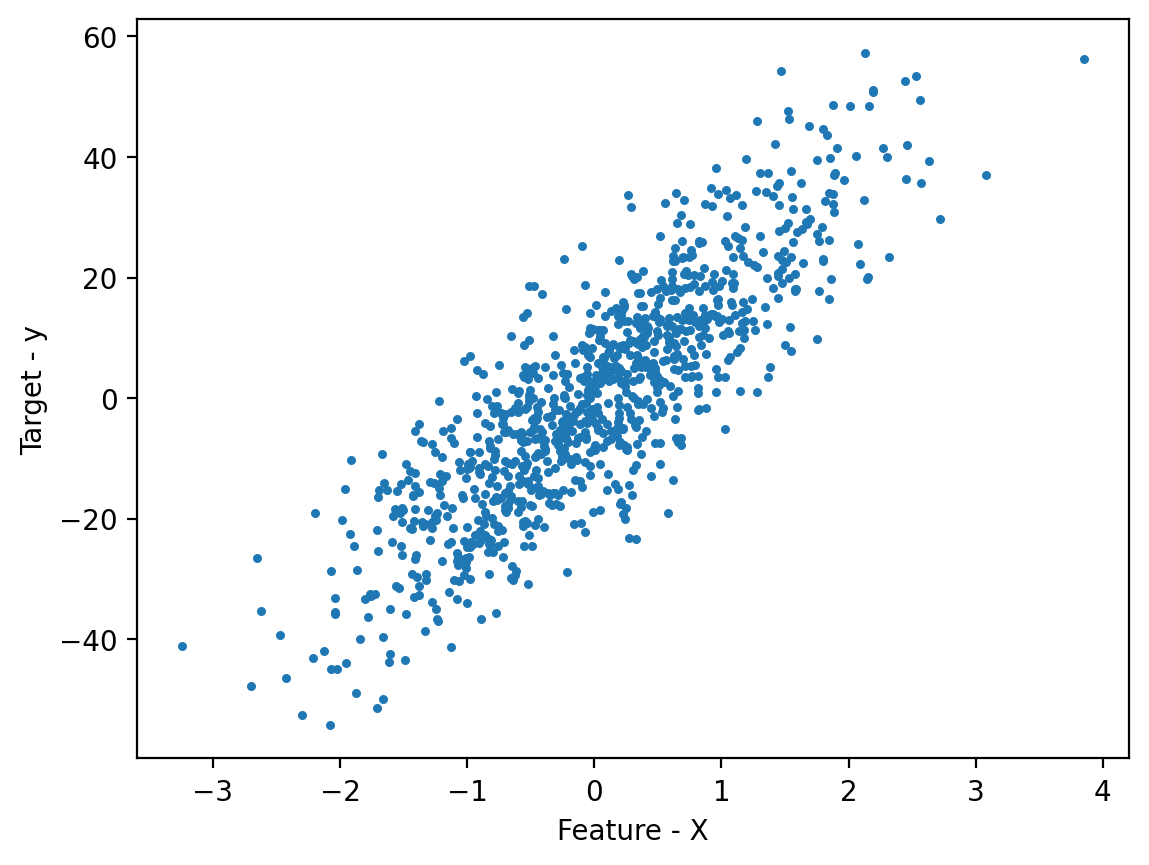

In [4]:
plt.xlabel('Feature - X')
plt.ylabel('Target - y')
plt.scatter(X, y, s=5)

In [5]:
lr = LinearRegression()
lr.fit(X, y)
lr.coef_, lr.intercept_

(array([16.63354605]), np.float64(0.045262059058209514))

In [6]:
# Predicting using trained model
y_pred = lr.predict(X)

* Blue dots represent maps to actual target data
* Orange dots represent predicted data

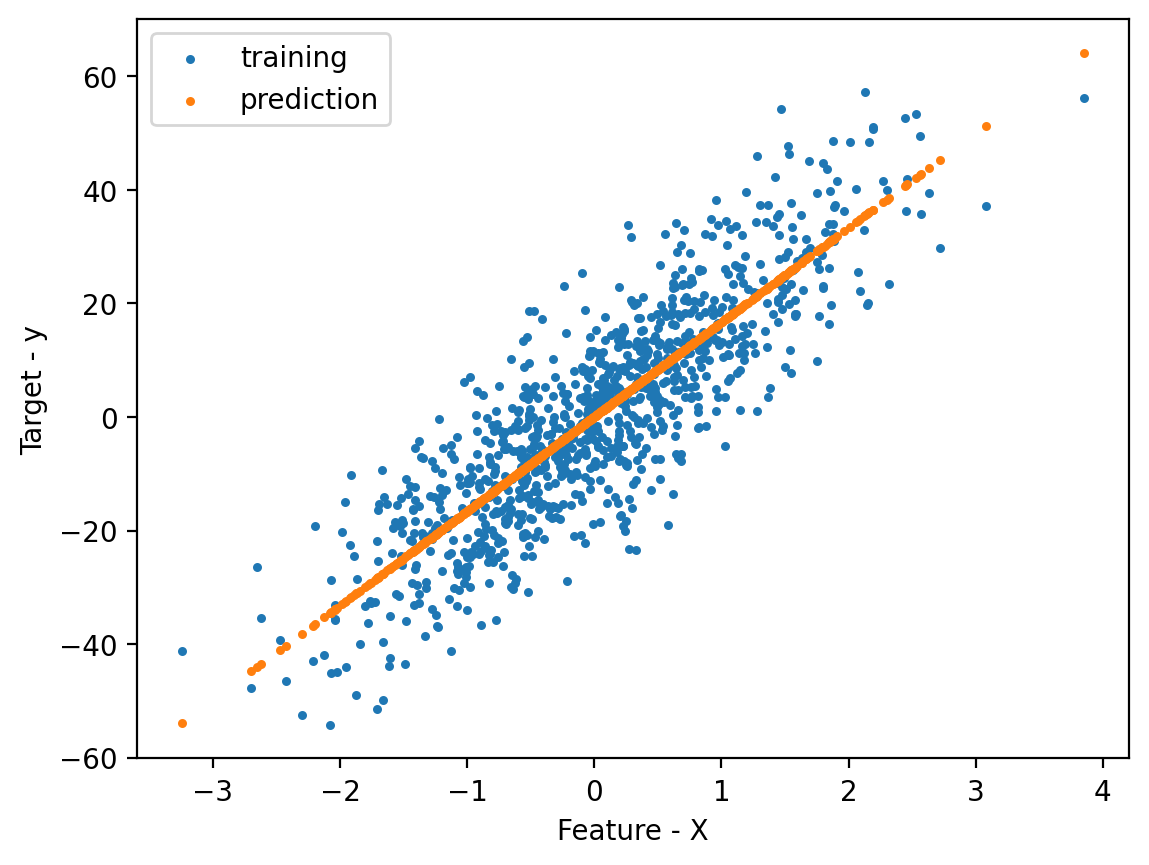

In [7]:
plt.scatter(X, y, s=5, label='training')
plt.scatter(X, y_pred, s=5, label='prediction')
plt.xlabel('Feature - X')
plt.ylabel('Target - y')
plt.legend()
plt.show()

## Regularized Regression Methods
- Ridge Regression
  * Ridge Regression imposes penalty on size of coef.
  * Less impacted by outliers.

In [8]:
outliers = y[975:] - 600; outliers

array([-596.20989757, -608.437806  , -595.54249235, -605.14184967,
       -585.14253937, -602.46852941, -591.20272709, -576.61995697,
       -624.29969481, -633.11859313, -584.0344489 , -580.06411958,
       -602.36414388, -600.03658325, -598.97777085, -600.7449772 ,
       -588.33620239, -610.44463741, -620.9629963 , -613.84011222,
       -622.5064205 , -586.40905438, -591.93411712, -562.64219745,
       -611.96087644])

In [9]:
import numpy as np
y_out = np.append(y[:975], outliers)

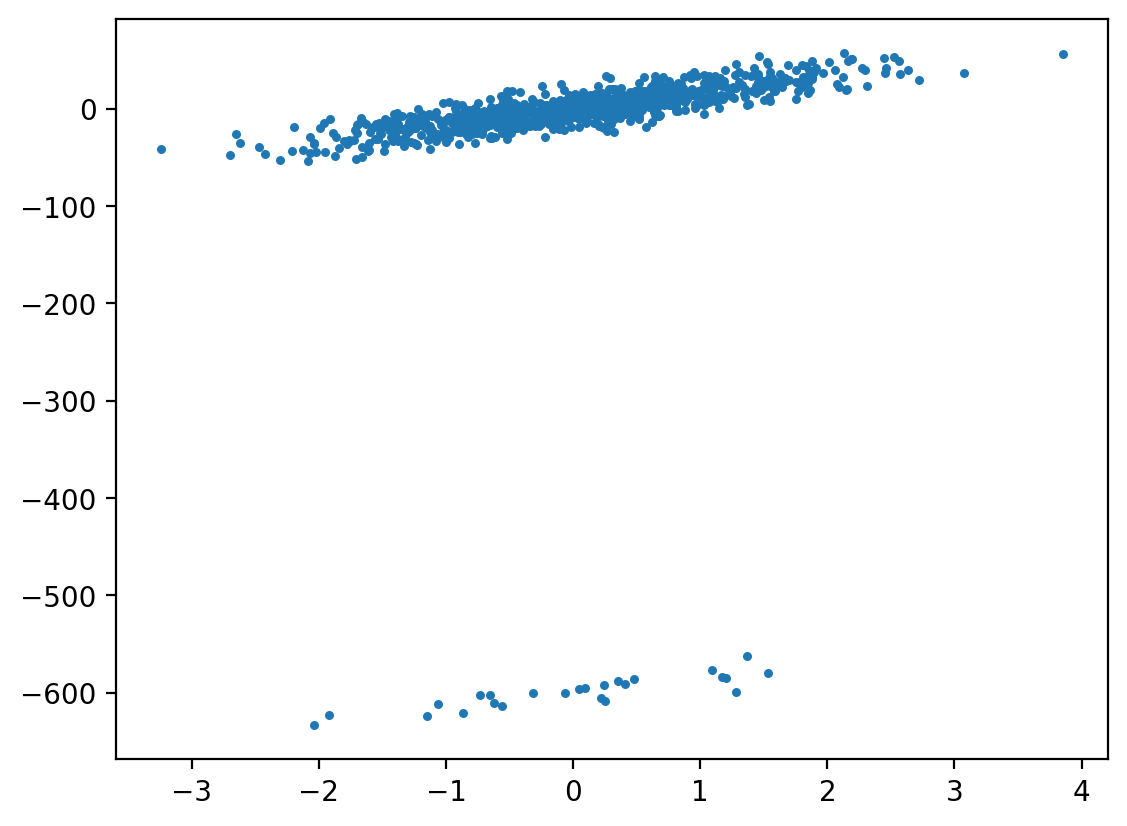

In [10]:
plt.scatter(X, y_out, s=5)

In [11]:
lr = LinearRegression()
lr.fit(X, y_out)
y_out_pred = lr.predict(X)

Text(0.5, 1.0, 'Linear Regression')

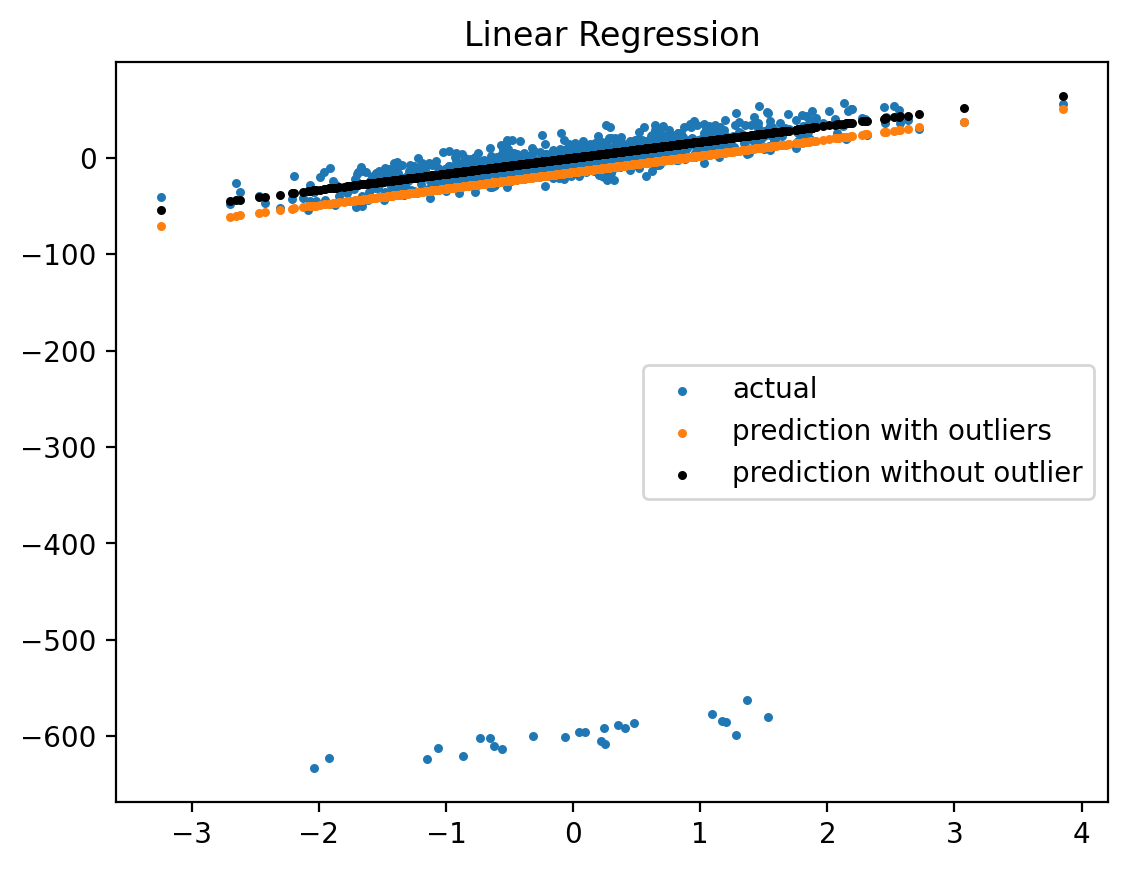

In [12]:
plt.scatter(X, y_out, s=5, label='actual')
plt.scatter(X, y_out_pred, s=5, label='prediction with outliers')
plt.scatter(X, y_pred, s=5, c='k', label='prediction without outlier')
plt.legend()
plt.title('Linear Regression')

In [13]:
lr.coef_, lr.intercept_

(array([17.08051501]), np.float64(-14.963378769875755))

In [14]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=500)
ridge.fit(X, y_out)
y_ridge_pred = ridge.predict(X)

Text(0.5, 1.0, 'Linear Regression')

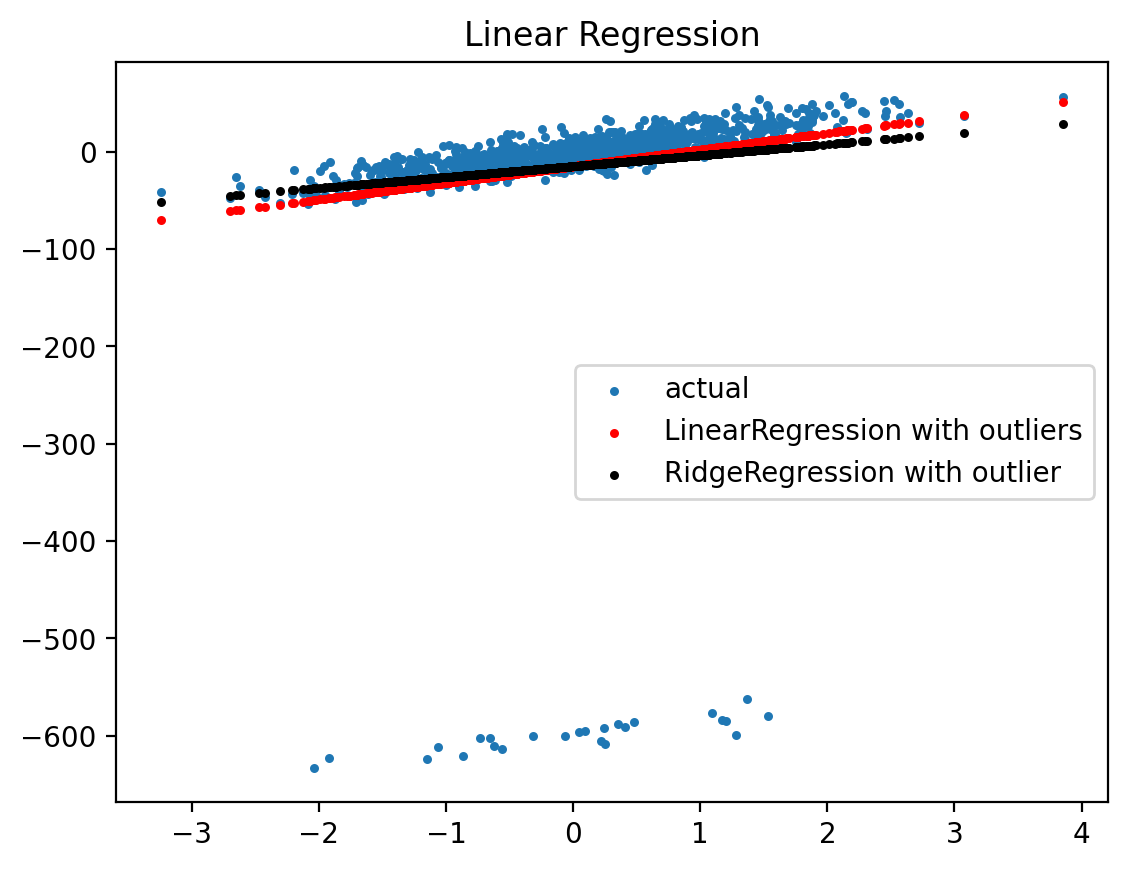

In [15]:
plt.scatter(X, y_out,s=5,label='actual')
plt.scatter(X, y_out_pred,s=5, c='r' , label='LinearRegression with outliers')
plt.scatter(X, y_ridge_pred,s=5,c='k', label='RidgeRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [16]:
ridge.coef_, ridge.intercept_    # 기울기 coefficient(w) 가 값이 훨씬 작아짐.

(array([11.22261785]), np.float64(-14.850133574866453))

In [17]:
lasso = Lasso(alpha=10)
lasso.fit(X, y_out)
y_lasso_pred = lasso.predict(X)

Text(0.5, 1.0, 'Linear Regression')

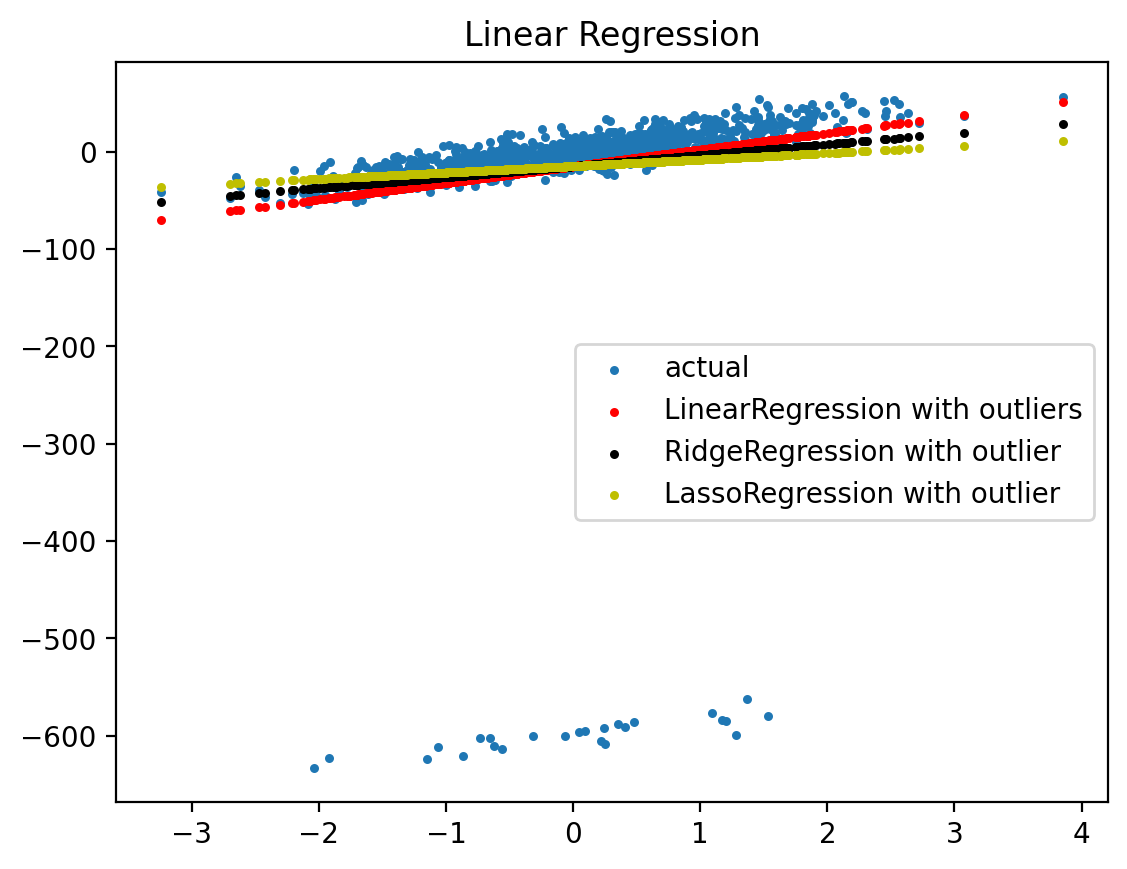

In [18]:
plt.scatter(X, y_out,s=5,label='actual')
plt.scatter(X, y_out_pred,s=5, c='r' , label='LinearRegression with outliers')
plt.scatter(X, y_ridge_pred,s=5,c='k', label='RidgeRegression with outlier')
plt.scatter(X, y_lasso_pred,s=5,c='y', label='LassoRegression with outlier')
plt.legend()
plt.title('Linear Regression')

In [19]:
lasso.coef_, lasso.intercept_

(array([6.64106631]), np.float64(-14.761562764848534))

## Effects of alpha using Ridge on Coefficients

In [20]:
X, y, w = make_regression(n_samples=1000, n_features=10, coef=True,
                          random_state=42, bias=3.5)
# w: The coefficient of the underlying linear model. It is returned only if coef is True.

In [21]:
w

array([32.12551734, 76.33080772, 33.6926875 ,  9.42759779,  5.16621758,
       58.28693612, 29.43481665,  7.18075454, 10.30191944, 75.31997019])

- Training Ridge for different values of alpha
  * Coefs calculated are appended to a list
  * Generate 20 alphas from 10^-6 to 10^6

In [22]:
alphas = np.logspace(-3, 5, 200)
alphas[:20], alphas[-20:]

(array([0.001     , 0.00109699, 0.00120338, 0.00132009, 0.00144812,
        0.00158857, 0.00174263, 0.00191164, 0.00209705, 0.00230043,
        0.00252354, 0.00276829, 0.00303677, 0.00333129, 0.00365438,
        0.00400881, 0.0043976 , 0.00482411, 0.00529198, 0.00580523]),
 array([ 17225.85965399,  18896.52339691,  20729.21779595,  22739.65752358,
         24945.0813523 ,  27364.39997075,  30018.35813576,  32929.71255097,
         36123.42699709,  39626.88638701,  43470.13158125,  47686.11697714,
         52310.99308056,  57384.41648302,  62949.88990222,  69055.13520162,
         75752.50258772,  83099.41949353,  91158.88299751, 100000.        ]))

In [23]:
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)

In [24]:
w

array([32.12551734, 76.33080772, 33.6926875 ,  9.42759779,  5.16621758,
       58.28693612, 29.43481665,  7.18075454, 10.30191944, 75.31997019])

In [25]:
coefs[:5]

[array([32.12547819, 76.33071941, 33.69264671,  9.42759217,  5.16620902,
        58.28688033, 29.43478769,  7.18074889, 10.30191419, 75.31989693]),
 array([32.12547439, 76.33071085, 33.69264275,  9.42759163,  5.16620819,
        58.28687492, 29.43478488,  7.18074834, 10.30191368, 75.31988982]),
 array([32.12547022, 76.33070145, 33.69263841,  9.42759103,  5.16620728,
        58.28686898, 29.4347818 ,  7.18074774, 10.30191312, 75.31988203]),
 array([32.12546566, 76.33069115, 33.69263365,  9.42759038,  5.16620628,
        58.28686247, 29.43477841,  7.18074708, 10.30191251, 75.31987348]),
 array([32.12546064, 76.33067984, 33.69262843,  9.42758966,  5.16620518,
        58.28685533, 29.43477471,  7.18074636, 10.30191184, 75.3198641 ])]

In [26]:
coefs[-5:]   # w 값이 굉장히 작아짐을 볼 수 있다.

[array([0.36905501, 0.94856311, 0.38307061, 0.18174143, 0.03080575,
        0.87029109, 0.43753906, 0.11359349, 0.22092661, 1.11708021]),
 array([0.3367566 , 0.86565699, 0.34953102, 0.1659322 , 0.02807343,
        0.79439856, 0.3993917 , 0.10368337, 0.2017385 , 1.01966879]),
 array([0.30725841, 0.78992058, 0.31890168, 0.15147756, 0.02558406,
        0.72504039, 0.36452758, 0.09462722, 0.18418953, 0.93064419]),
 array([0.28032211, 0.72074665, 0.29093448, 0.1382649 , 0.02331595,
        0.66166797, 0.33267124, 0.08635322, 0.16814427, 0.84930233]),
 array([0.2557289 , 0.65757725, 0.26540173, 0.12619038, 0.02124935,
        0.60377642, 0.30356917, 0.07879532, 0.15347768, 0.77499522])]

- Plotting alphas & coefs: different colors represents different coefs

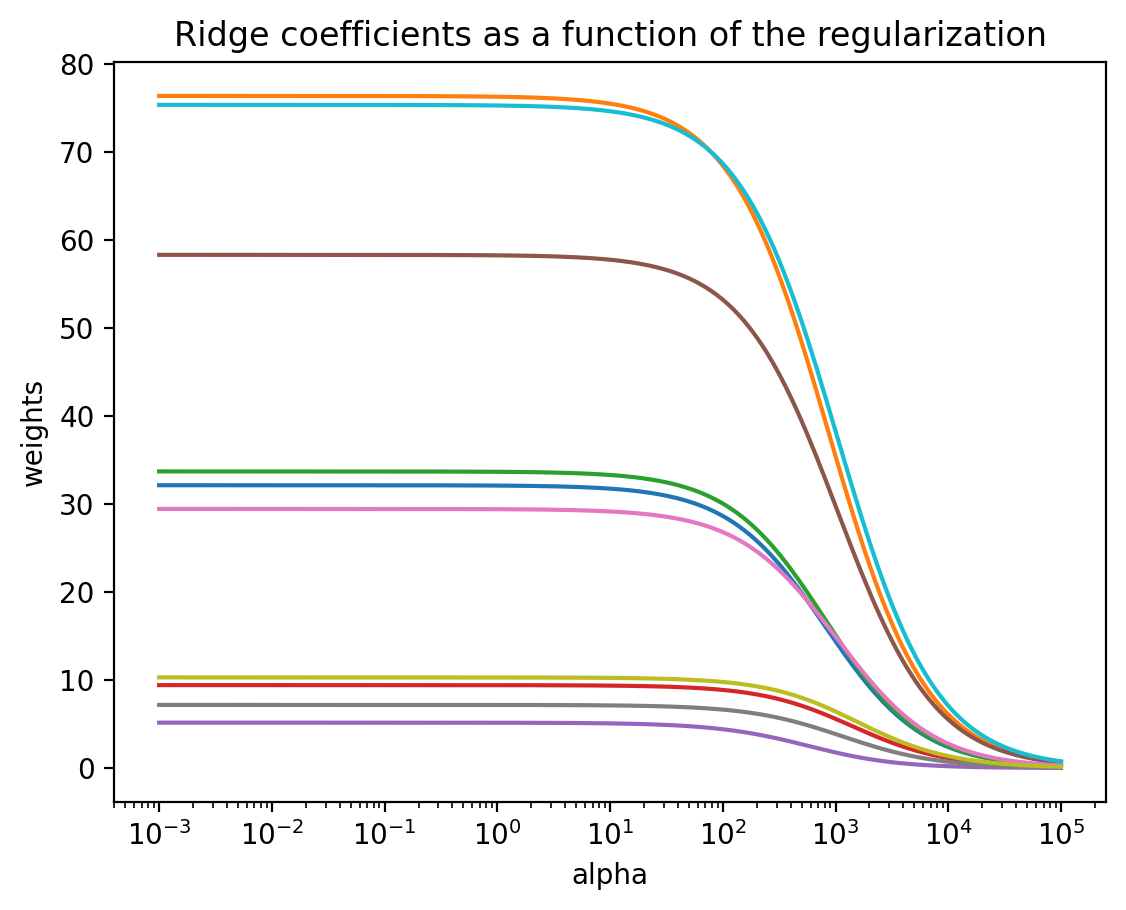

In [27]:
ax = plt.gca()
# Get the current Axes instance on the current figure matching the given keyword
# args, or create one.

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

- Conclusion
  * As alpha tends toward zero the coefficients found by Ridge regression stabilize towards the randomly sampled vector w (similar to LinearRegression).
  * For big alpha (strong regularisation) the coefficients are smaller (eventually converging at 0) leading to a simpler and biased solution.

## Lasso

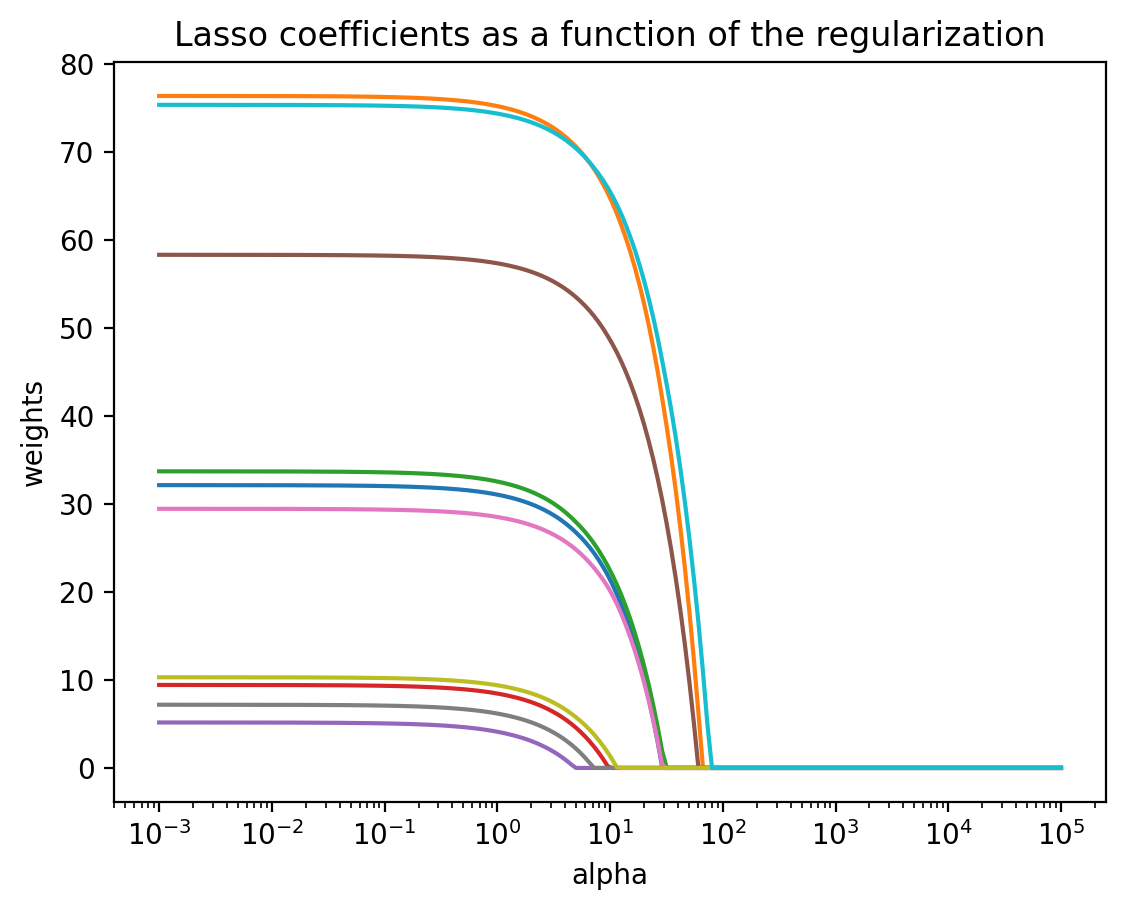

In [28]:
# lasso
X, y, w = make_regression(n_samples=1000, n_features=10, coef=True,
                          random_state=42, bias=3.5)

alphas = np.logspace(-3, 5, 200)
coefs = []
for a in alphas:
    lasso = Lasso(max_iter=10000, alpha=a)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()


# Example - Indian Supermarket
- https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/

In [29]:
# data to train and test
!curl -L https://bit.ly/2HsDP2p -o train.csv
!curl -L https://bit.ly/2WgqtdO -o test.csv
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   112  100   112    0     0    456      0 --:--:-- --:--:-- --:--:--   457
100   125  100   125    0     0    220      0 --:--:-- --:--:-- --:--:--   220
100    17  100    17    0     0     17      0  0:00:01 --:--:--  0:00:01     0
100  849k  100  849k    0     0   582k      0  0:00:01  0:00:01 --:--:--  582k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   111  100   111    0     0    760      0 --:--:-- --:--:-- --:--:--   760
100   124  100   124    0     0    330      0 --:--:-- --:--:-- --:--:--   330
100    17  100    17    0     0     24      0 --:--:-- --:--:-- --:--:--    24
100  515k  100  515k    0     0   346k      0  0:00:01  0:00:01 --:--:-- 2961k


In [30]:
train_df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [31]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].str.lower()
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].str.lower()

In [32]:
train_df['Item_Fat_Content'] = train_df['Item_Fat_Content'].replace(["lf","reg"], ["low fat","regular"])
test_df['Item_Fat_Content'] = test_df['Item_Fat_Content'].replace(["lf","reg"], ["low fat","regular"])

In [33]:
train_df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
low fat,5517
regular,3006


In [34]:
test_df['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
low fat,3668
regular,2013


In [35]:
train_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [36]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


- let's use two features (매장 개장 연도, 추천 가격(Item_MRP))

In [37]:
X, y = train_df.loc[:,['Outlet_Establishment_Year','Item_MRP']], train_df['Item_Outlet_Sales']

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
lreg = LinearRegression()

np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3)
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

mse = np.mean((pred - y_test)**2)

print(mse, mse**(0.5))             # mse and rmse
print(lreg.score(x_test, y_test))  # r2-score

1990314.4086564414 1410.7850327588683
0.3242020337746536


In [39]:
lreg.coef_, x_train.columns

(array([-9.63343761, 15.64158088]),
 Index(['Outlet_Establishment_Year', 'Item_MRP'], dtype='object'))

In [40]:
# 선형모델 계수 출력

coeff = pd.DataFrame(x_train.columns)
coeff['Coefficient Estimate'] = pd.Series(lreg.coef_)
coeff

,0,Coefficient Estimate
0,Outlet_Establishment_Year,-9.633438
1,Item_MRP,15.641581


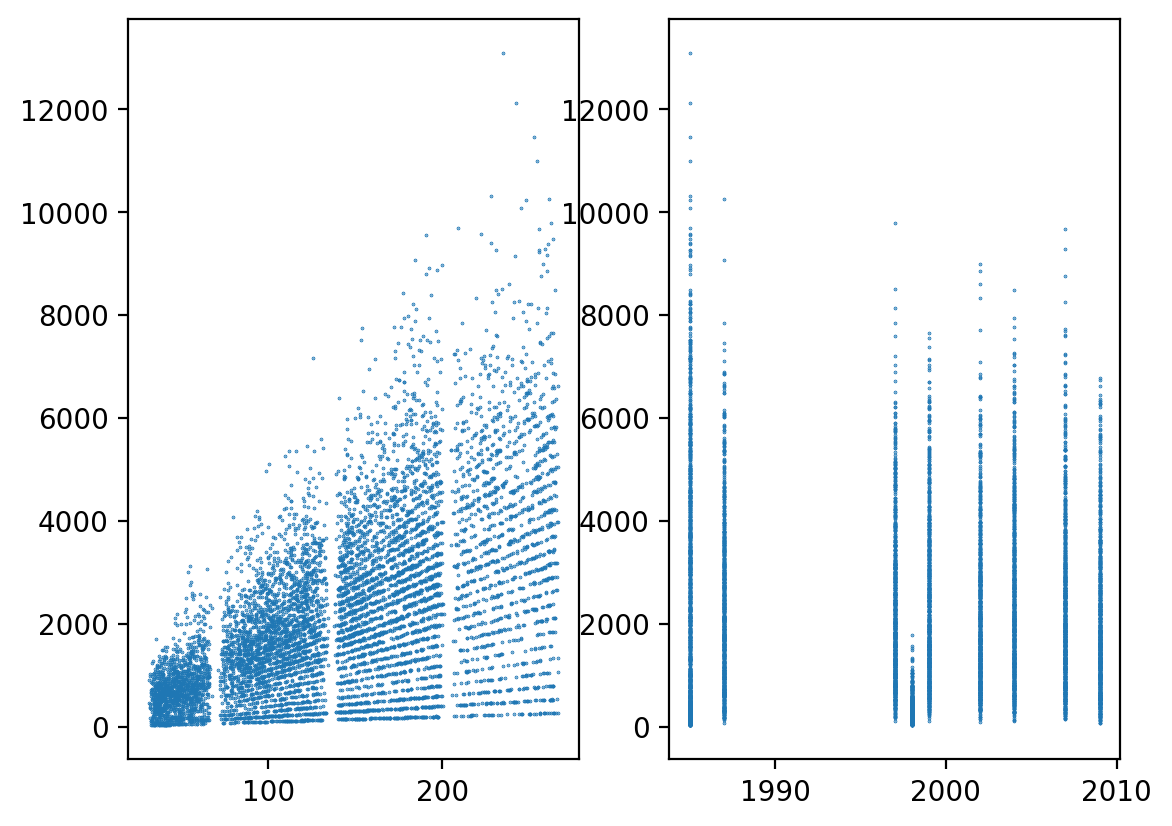

In [41]:
plt.subplot(1,2,1)
plt.scatter(train_df.Item_MRP, train_df.Item_Outlet_Sales, s=0.1)
plt.subplot(1,2,2)
plt.scatter(train_df.Outlet_Establishment_Year, train_df.Item_Outlet_Sales, s=0.1)

- 매출이 설립연도와는 음의 관계, 상품가격에는 양의 관계.

- let's use all features

In [42]:
train_df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [43]:
# 무게를 평균치로 대체
train_df['Item_Weight'] = train_df['Item_Weight'].fillna((train_df['Item_Weight'].mean()))

<Axes: >

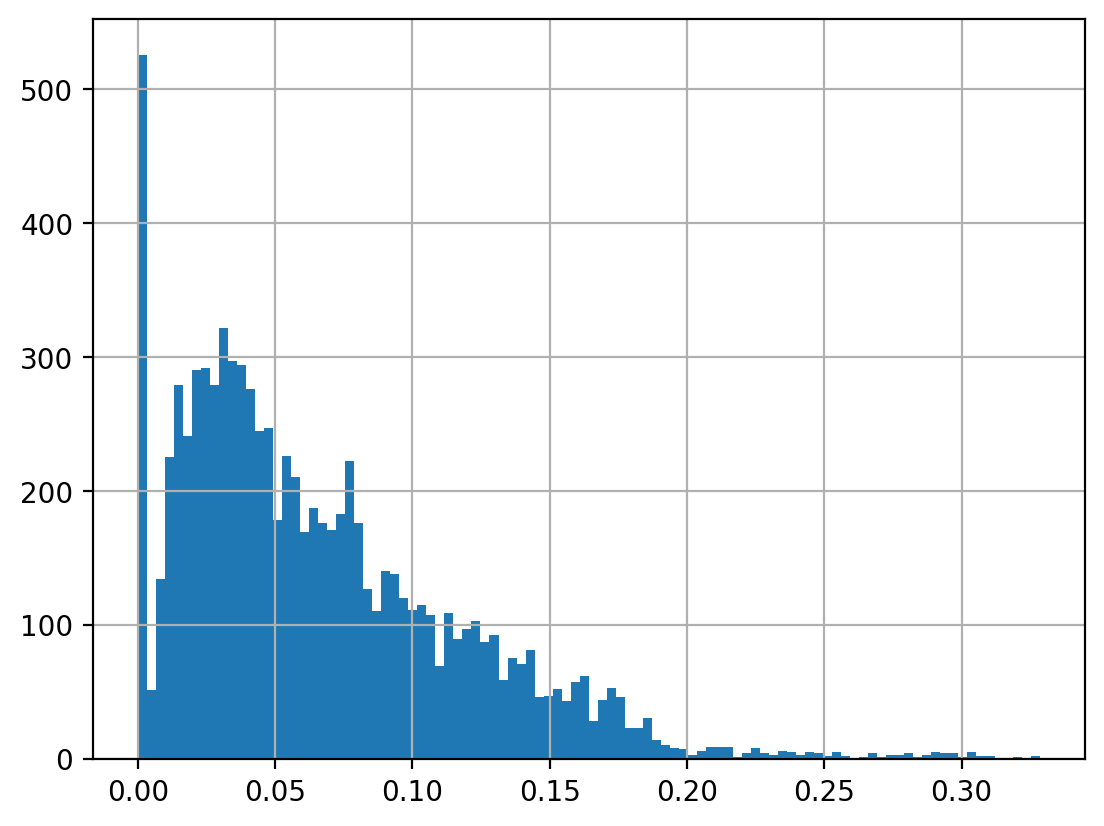

In [44]:
train_df.Item_Visibility.hist(bins=100)   # 상품의 가시성

- 결측치는 아니지만 값이 의미없는 값인 0 이 많다. 실제로는 결측치로 보고 평균치로 대체

In [45]:
# 0을 평균치로 대체
train_df['Item_Visibility'] = train_df['Item_Visibility'].replace(0,np.mean(train_df['Item_Visibility']))

<Axes: >

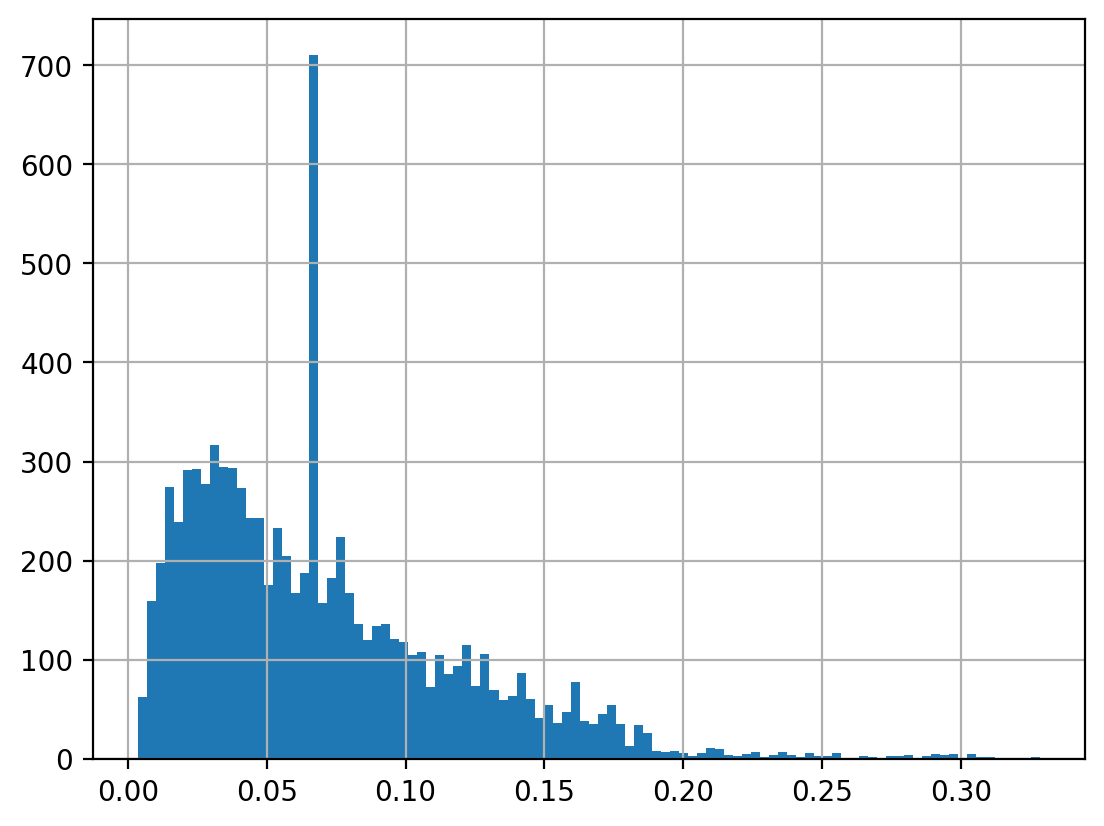

In [46]:
train_df.Item_Visibility.hist(bins=100)

In [47]:
train_df.Outlet_Establishment_Year.value_counts()

,count
Outlet_Establishment_Year,
1985,1463
1987,932
1999,930
1997,930
2004,930
2002,929
2009,928
2007,926
1998,555


- 설립연도보다는 설립연도 후 경과한 연수로 바꾸는 게 좋다.

In [48]:
# 연도를 설립 기간으로 대체 (의미 있는 수치로 대체))
train_df['Outlet_Establishment_Year'] = 2013 - train_df['Outlet_Establishment_Year']

<Axes: >

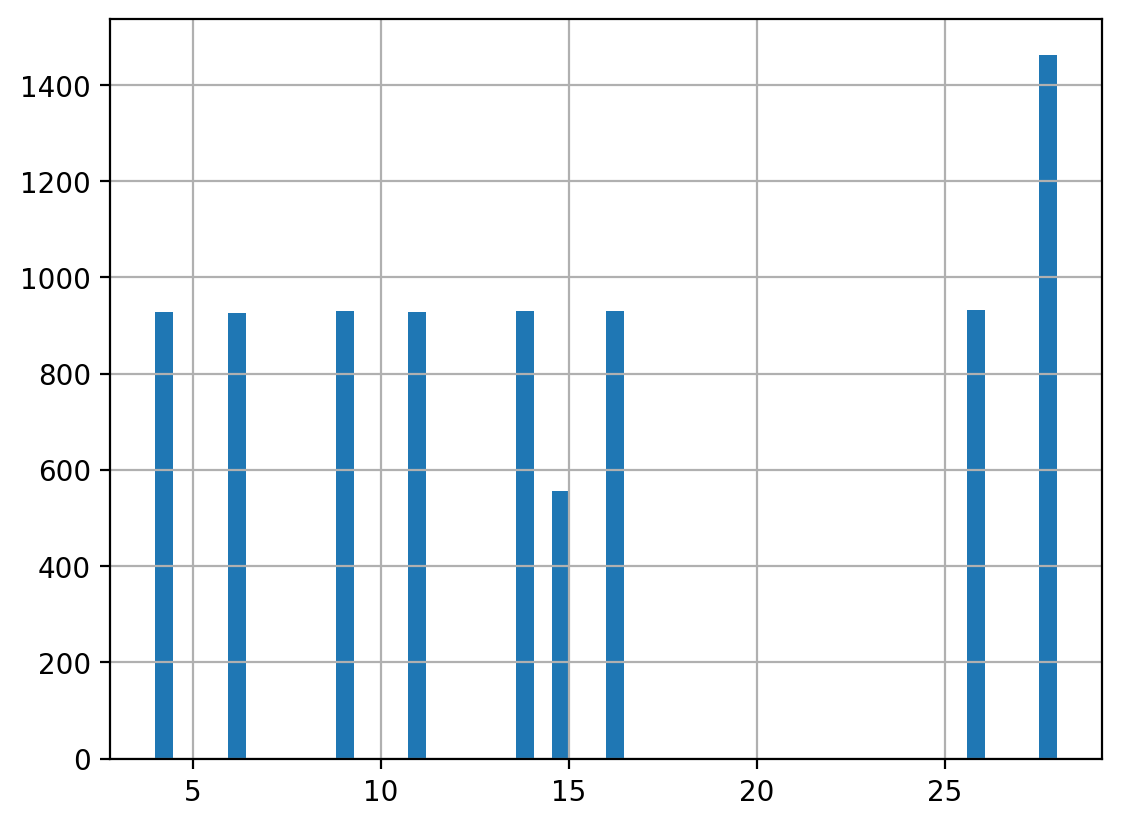

In [49]:
train_df.Outlet_Establishment_Year.hist(bins=50)

In [50]:
train_df.Outlet_Size.isnull().sum()

np.int64(2410)

In [51]:
train_df.Outlet_Size.value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


- 결측치를 Small 매장으로 대체한다.

In [52]:
train_df['Outlet_Size'] = train_df['Outlet_Size'].fillna('Small')

In [53]:
train_df.Outlet_Size.value_counts()

,count
Outlet_Size,
Small,4798
Medium,2793
High,932


In [54]:
train_df.isnull().sum().sum()  # no NAN

np.int64(0)

In [55]:
# 상품명은 분석에서 제외
train_df.drop("Item_Identifier", axis=1, inplace=True)

In [56]:
train_df.dtypes

,0
Item_Weight,float64
Item_Fat_Content,object
Item_Visibility,float64
Item_Type,object
Item_MRP,float64
Outlet_Identifier,object
Outlet_Establishment_Year,int64
Outlet_Size,object
Outlet_Location_Type,object
Outlet_Type,object


In [57]:
# 카테고리 변수 인코딩
# 먼저 타입이 object인 카테고리 변수의 리스트를 만든다.
object_list = list(train_df.select_dtypes(include=['object']).columns)
object_list

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [58]:
dummies = pd.get_dummies(train_df[object_list], prefix= object_list)

In [59]:
dummies.columns

Index(['Item_Fat_Content_low fat', 'Item_Fat_Content_regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Groce

In [60]:
# 원래의 열은 삭제하고 dummies 추가
X1 = train_df.drop(object_list, axis=1)

In [61]:
X1, y = X1.drop('Item_Outlet_Sales',axis=1), X1.Item_Outlet_Sales

In [62]:
X1.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,9.30,0.016047,249.8092,14
1,5.92,0.019278,48.2692,4
2,17.50,0.016760,141.6180,14
3,19.20,0.066132,182.0950,15
4,8.93,0.066132,53.8614,26


In [63]:
col = X1.columns; col

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [64]:
# scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X1 = sc.fit_transform(X1)

In [65]:
X = pd.concat([pd.DataFrame(X1, columns=col),dummies], axis =1)

In [66]:
dummies.shape, X1.shape, X.shape

((8523, 38), (8523, 4), (8523, 42))

In [67]:
X.head(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_low fat,Item_Fat_Content_regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,-0.841872,-1.111358,1.747454,-0.139541,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,-1.641706,-1.045067,-1.489023,-1.334103,False,True,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,1.098554,-1.096733,0.010040,-0.139541,True,False,False,False,False,False,...,False,True,False,True,False,False,False,True,False,False


In [68]:
# 4개의 실수로 된 특성만 사용하는 경우
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X1, y, test_size =0.3)
lreg.fit(x_train,y_train)
pred_test = lreg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
print(mse**0.5)
print(lreg.score(x_test,y_test))

1387.9151553183915
0.3459348199771226


In [69]:
# 42개의 모든 특성을 사용하는 경우
np.random.seed(7)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.3)
lreg.fit(x_train,y_train)
pred_test = lreg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
print(mse**0.5)
print(lreg.score(x_test,y_test))   # much better performance

1152.4900856024813
0.5490072197942049


### Residual plot
- 예측값에 대해 오차의 발생 형태가 랜덤하지 않고 비선형 성분이 많이 들어 있다. 그림에서 양수, 음수 그대로 보임.

Text(0.5, 1.0, 'Residual plot')

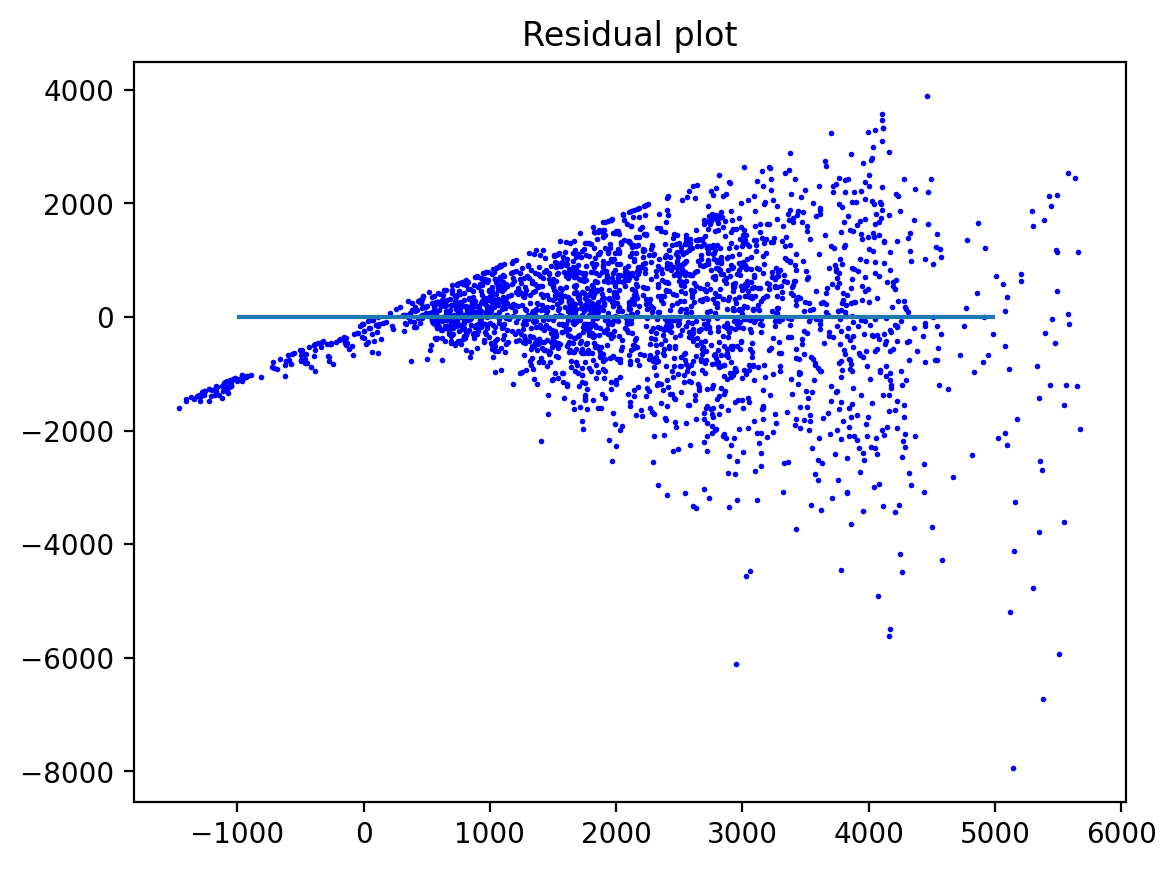

In [70]:
x_plot = plt.scatter(pred_test, (pred_test - y_test), c='b', s=1)
plt.hlines(y=0, xmin= -1000, xmax=5000)
plt.title('Residual plot')

- 전체 45개 특성 계수의 크기를 나열해 보자

In [71]:
pd.Series(lreg.coef_, index=X.columns)

,0
Item_Weight,-0.855509
Item_Visibility,-6.086616
Item_MRP,978.837961
Outlet_Establishment_Year,111.482594
Item_Fat_Content_low fat,-17.550918
Item_Fat_Content_regular,17.550918
Item_Type_Baking Goods,-7.784112
Item_Type_Breads,-30.616112
Item_Type_Breakfast,69.052628
Item_Type_Canned,-26.452038


<Axes: title={'center': 'Modal Coefficients'}>

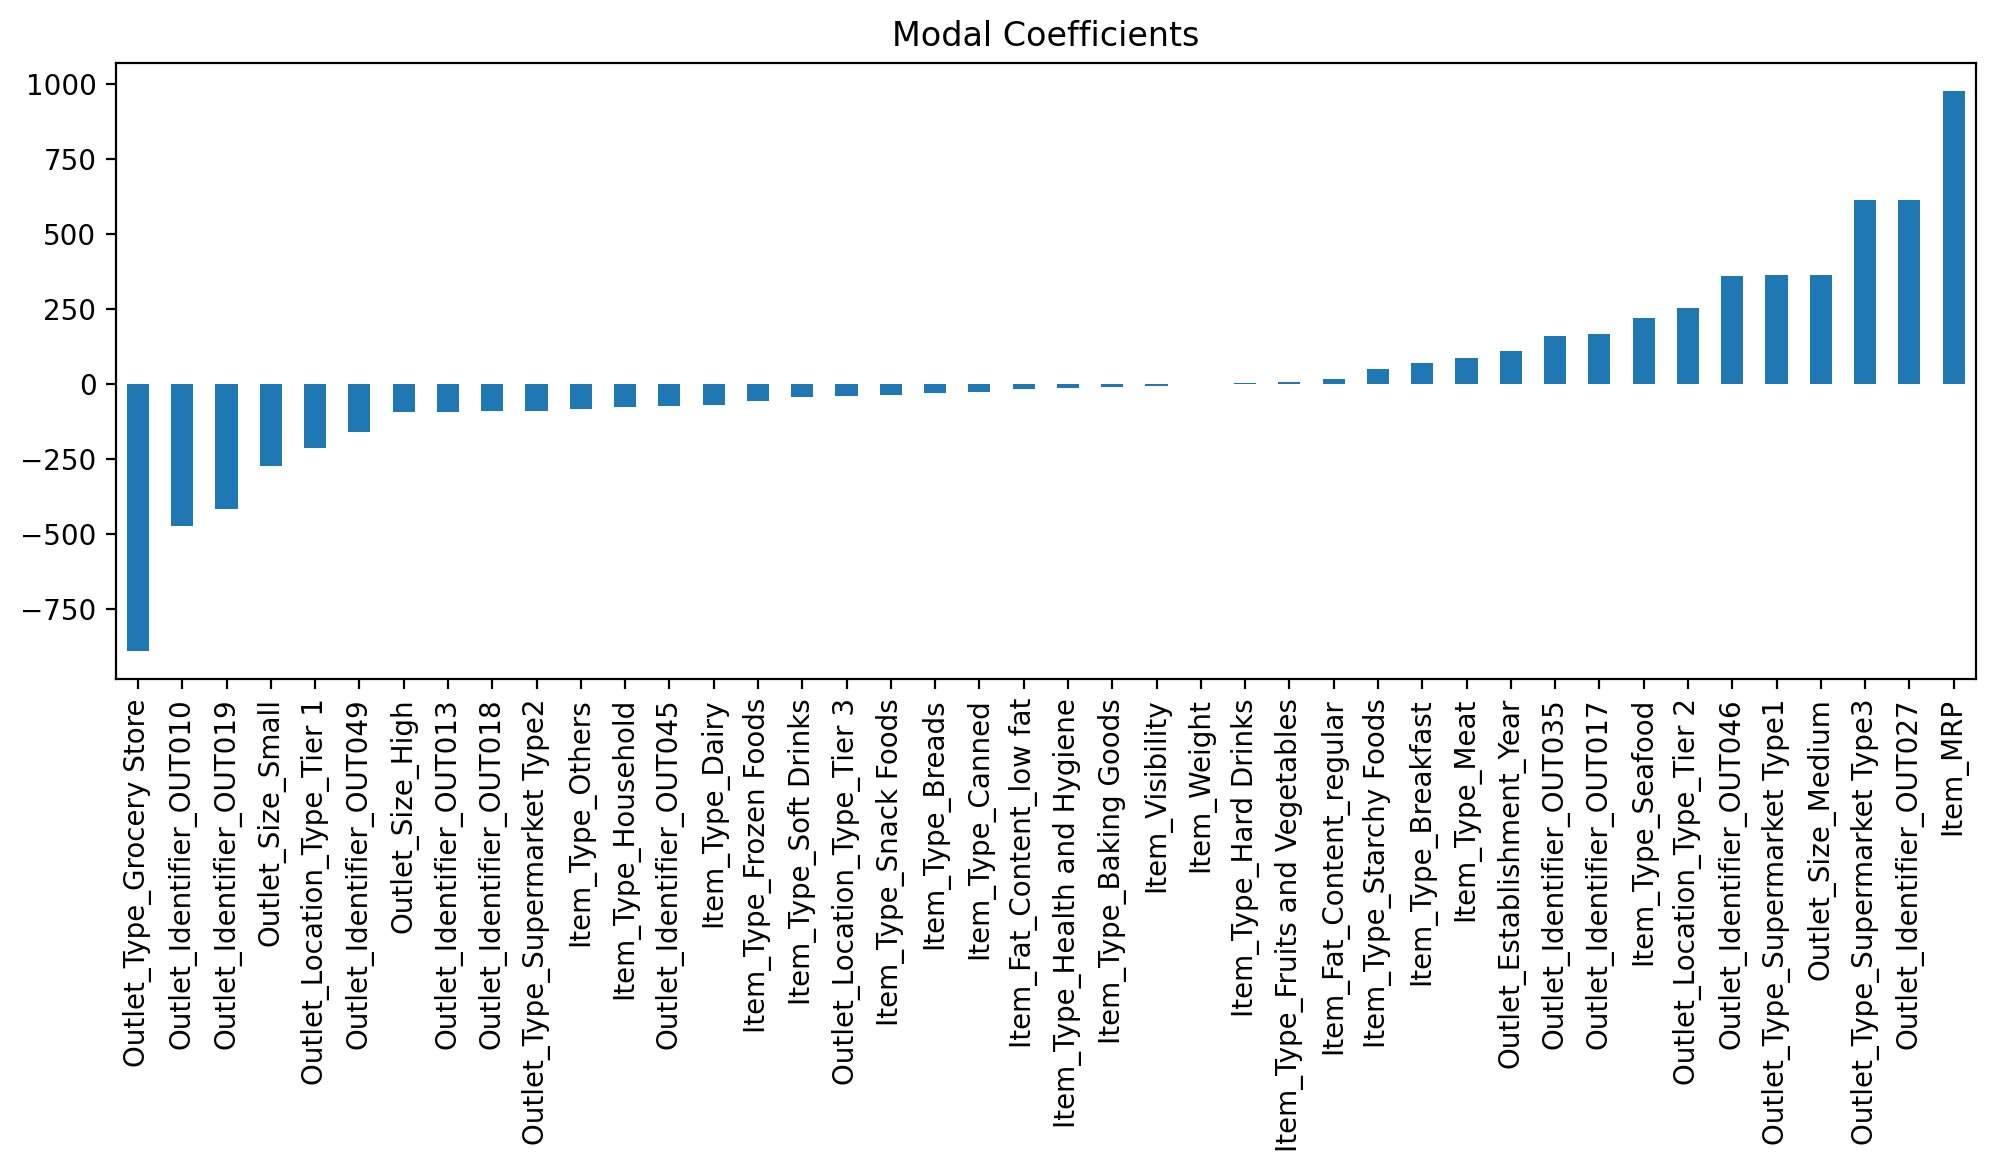

In [72]:
# checking the magnitude of coefficients
plt.figure(figsize= (10,10))
predictors = X.columns
coef = pd.Series(lreg.coef_, predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients', figsize=(12,4))

### Ridge regularizer

In [73]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

ridgeReg = make_pipeline(StandardScaler(), Ridge(alpha=0.5))

ridgeReg.fit(x_train,y_train)
pred = ridgeReg.predict(x_test)
mse = np.mean((pred_test - y_test)**2)
mse**0.5, ridgeReg.score(x_test, y_test)

(np.float64(1152.4900856024813), 0.5490096524459791)

<Axes: title={'center': 'Ridge Modal Coefficients'}>

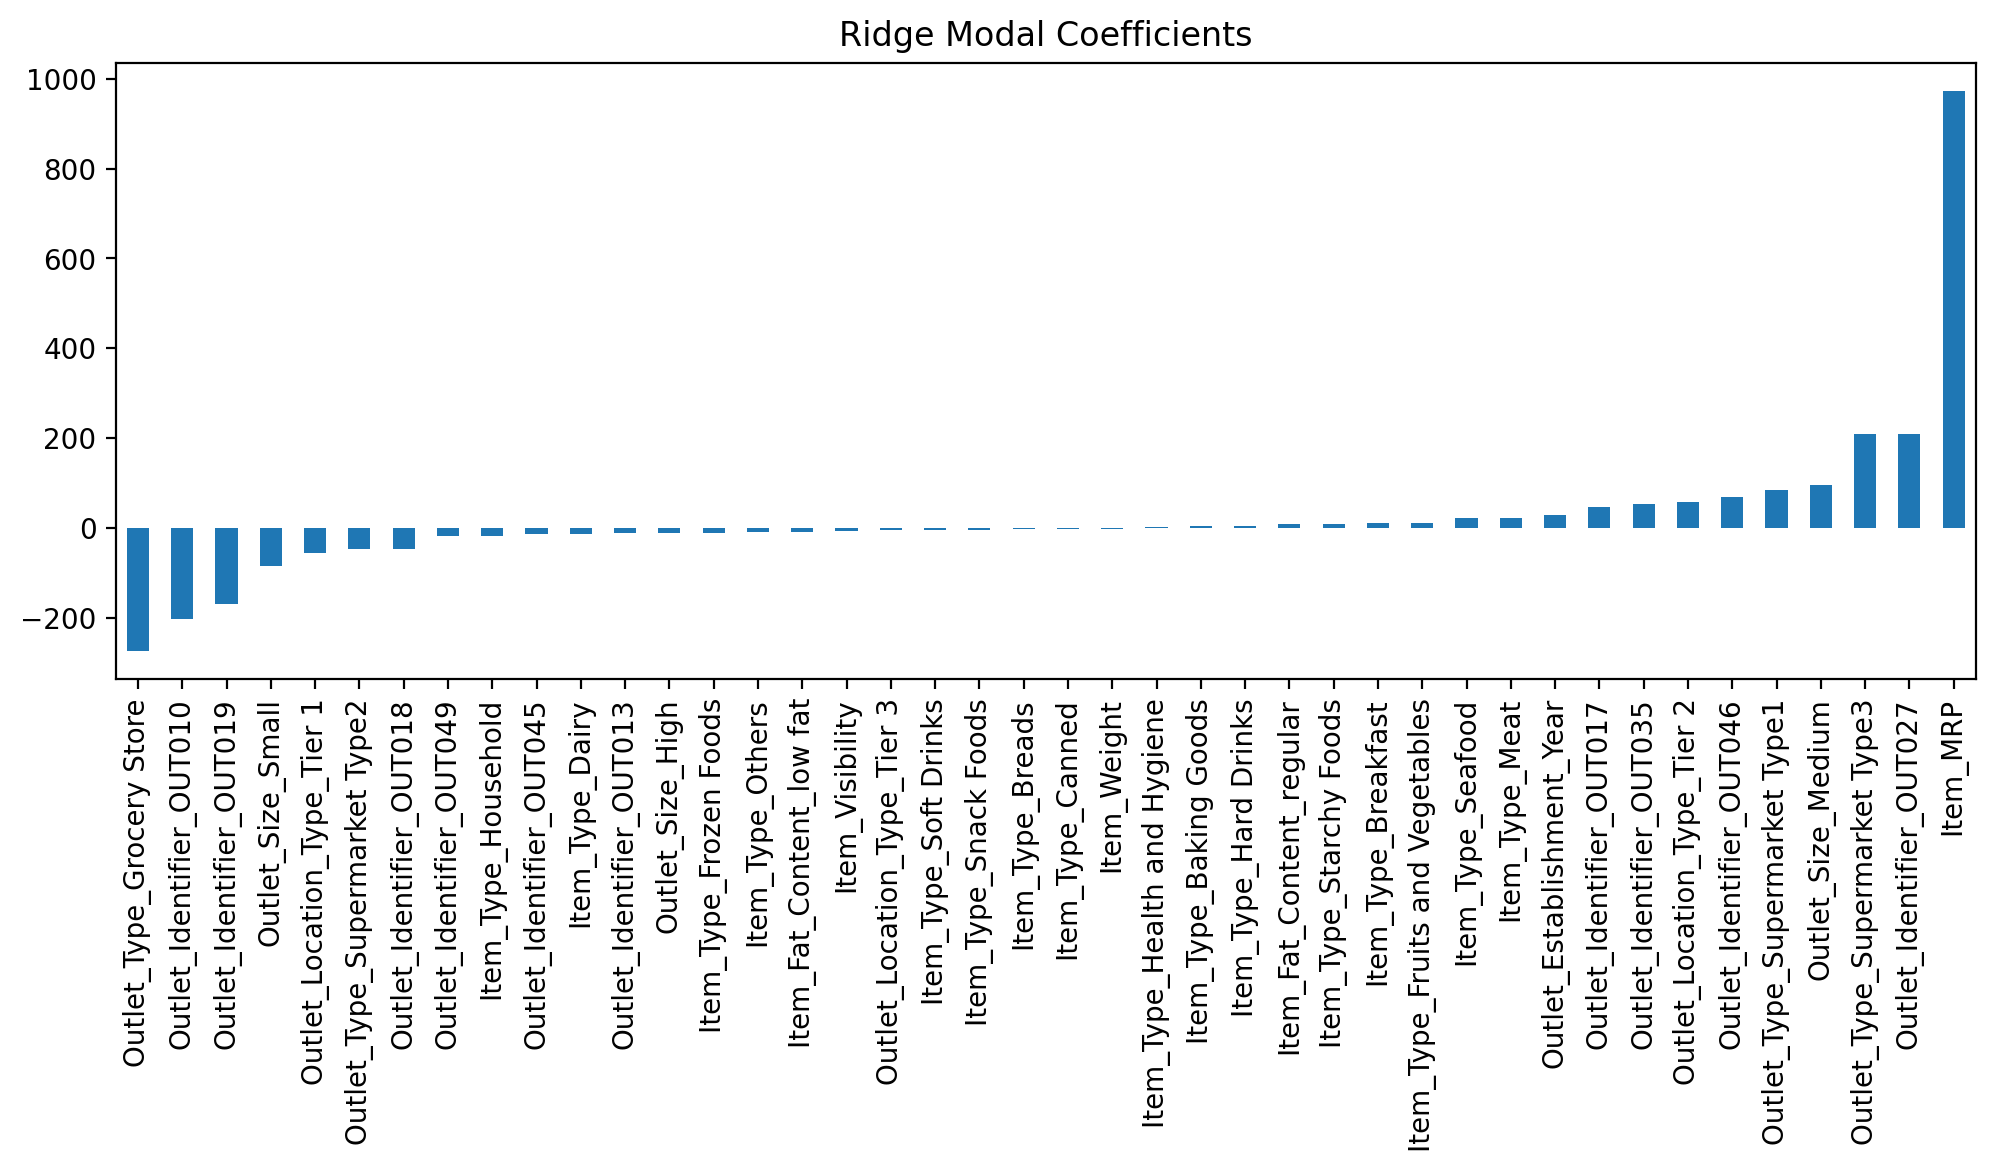

In [74]:
plt.figure(figsize= (10,10))
predictors = X.columns
coef = pd.Series(ridgeReg[1].coef_, predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients', figsize=(12,4))

- 위의 결과 -> 큰 계수의 값이 줄어듬을 확인할 수 있다.

In [75]:
alpha = [0, 0.001, 0.01, 0.05, 0.5, 1, 5, 10e2, 10e3, 10e4]
for a in alpha:
    ridgeReg = make_pipeline(StandardScaler(), Ridge(alpha=a))
    ridgeReg.fit(x_train,y_train)
    print("alpha= {:20f},  R square = {} \t {}".format(
        a, ridgeReg.score(x_train, y_train), ridgeReg.score(x_test, y_test)))

alpha=             0.000000,  R square = 0.5419051099915735 	 0.5232971434901978
alpha=             0.001000,  R square = 0.5694328129289125 	 0.5490072246654121
alpha=             0.010000,  R square = 0.5694328129278631 	 0.5490072685052114
alpha=             0.050000,  R square = 0.5694328129024243 	 0.5490074633255727
alpha=             0.500000,  R square = 0.5694328102794439 	 0.5490096524459791
alpha=             1.000000,  R square = 0.5694328023327444 	 0.5490120791842017
alpha=             5.000000,  R square = 0.5694325483716397 	 0.5490312805413183
alpha=          1000.000000,  R square = 0.561586123743649 	 0.5450403064093913
alpha=         10000.000000,  R square = 0.4038404261280414 	 0.3969945824595513
alpha=        100000.000000,  R square = 0.09891404933010728 	 0.09750409642652969


In [76]:
ridgeReg, ridgeReg[0], ridgeReg[1]

(Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(alpha=100000.0))]),
 StandardScaler(),
 Ridge(alpha=100000.0))

### Lasso

In [77]:
from sklearn.linear_model import Lasso
# lassoReg = Lasso(alpha=0.05, normalize=True)
lassoReg = make_pipeline(StandardScaler(), Lasso(alpha=2.0))
lassoReg.fit(x_train,y_train)
print(lassoReg.score(x_test,y_test))

0.5493406044000819


<Axes: title={'center': 'Ridge Modal Coefficients'}>

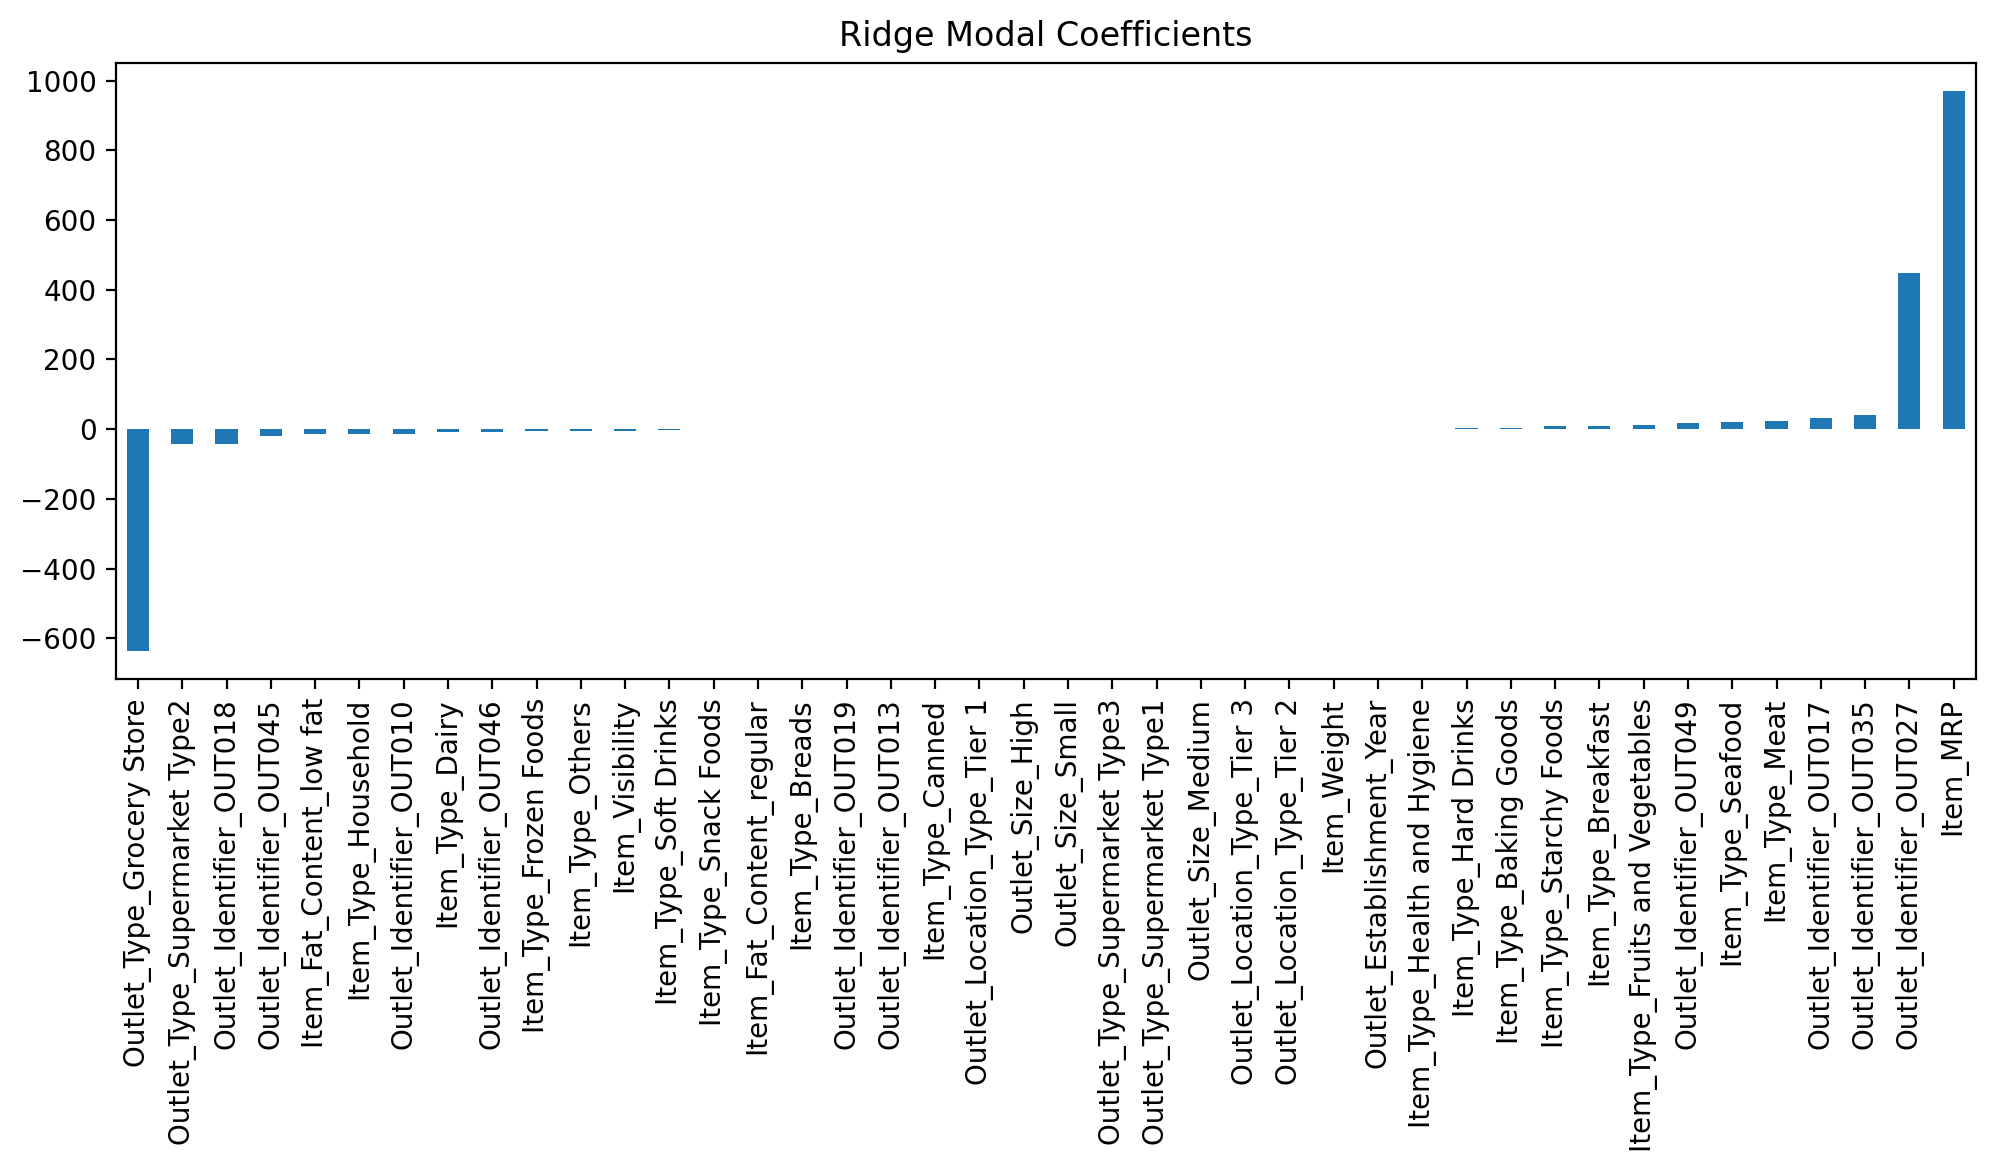

In [78]:
plt.figure(figsize= (10,10))
predictors = X.columns
coef = pd.Series(lassoReg[1].coef_, predictors).sort_values()
coef.plot(kind='bar', title='Ridge Modal Coefficients', figsize=(12,4))

- 결과 -> 중요도가 적은 계수의 크기가 줄어든 것 확인

# Another example
- https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/

In [79]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8,6

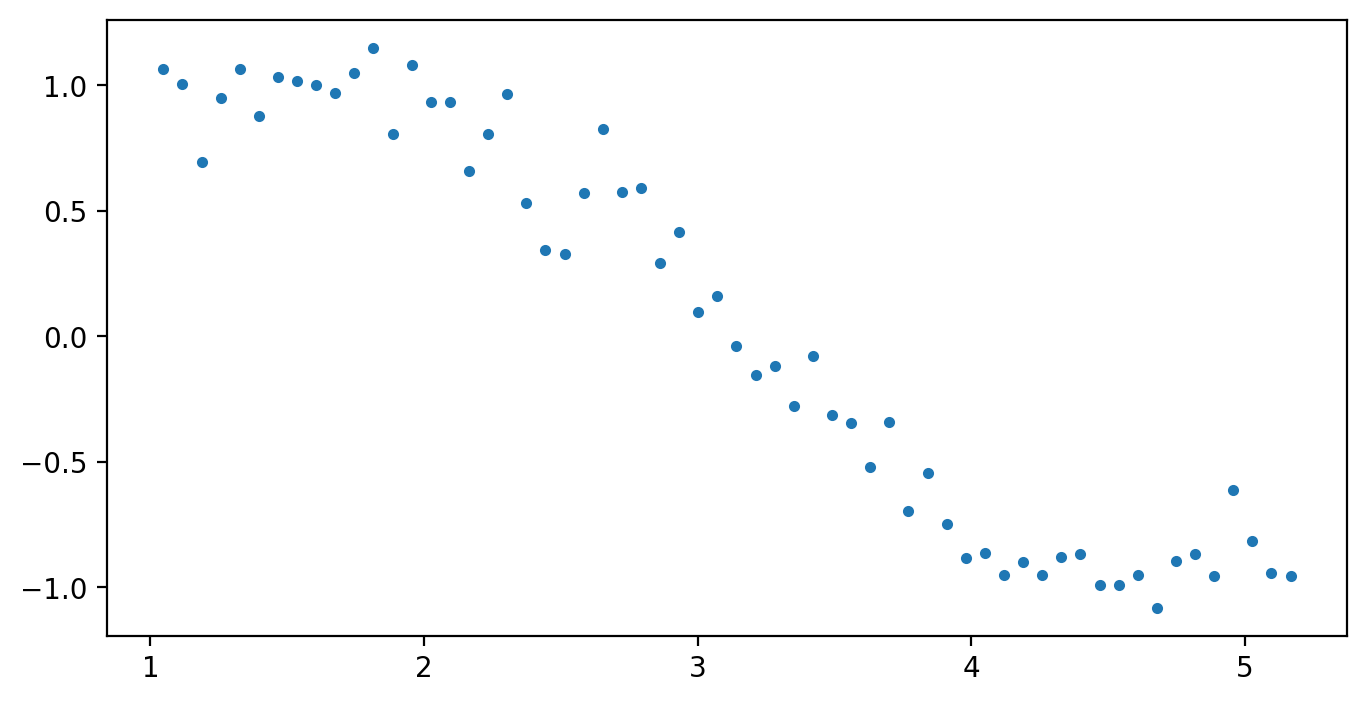

In [80]:
# define input array with angles from 60deg to 300deg converted to radians

np.random.seed(10)
x = np.array([i*np.pi/180 for i in range(60, 300, 4)])
y = np.sin(x) + np.random.normal(0, 0.15, len(x))
data = pd.DataFrame(np.column_stack([x,y]), columns=['x','y'])
plt.figure(figsize=(8,4))
plt.plot(data['x'], data['y'], '.')

### Polynomial regression with powers of x from 1 to 15

In [81]:
for i in range(2,16):       # power of 1 is already there
    colname = 'x_%d'%i      # new var will be x_power
    data[colname] = data['x']**i

data.head()

,x,y,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,x_11,x_12,x_13,x_14,x_15
0,1.047198,1.065763,1.096623,1.148381,1.202581,1.259340,1.318778,1.381021,1.446202,1.514459,1.585938,1.660790,1.739176,1.821260,1.907219,1.997235
1,1.117011,1.006086,1.247713,1.393709,1.556788,1.738948,1.942424,2.169709,2.423588,2.707173,3.023942,3.377775,3.773011,4.214494,4.707635,5.258479
2,1.186824,0.695374,1.408551,1.671702,1.984016,2.354677,2.794587,3.316683,3.936319,4.671717,5.544505,6.580351,7.809718,9.268760,11.000386,13.055521
3,1.256637,0.949799,1.579137,1.984402,2.493673,3.133642,3.937850,4.948448,6.218404,7.814277,9.819710,12.339811,15.506664,19.486248,24.487142,30.771450
4,1.326450,1.063496,1.759470,2.333850,3.095735,4.106339,5.446854,7.224981,9.583578,12.712139,16.862020,22.366630,29.668222,39.353420,52.200353,69.241170


In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

def linear_regression(data, power, models_to_plot):
    # initialize predictors:
    predictors=['x']
    if power>=2:
        predictors.extend(['x_%d'%i for i in range(2, power+1)])

    # fit the model
    linreg = make_pipeline(StandardScaler(), LinearRegression())
    linreg.fit(data[predictors], data['y'])
    y_pred = linreg.predict(data[predictors])

     # check if a plot is to be made for the entered power
    if power in models_to_plot:
        plt.subplot(models_to_plot[power])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for power: %d'%power)

    #Return the result in pre-defined format
    mse = sum((y_pred - data['y'])**2) / len(data)
    ret = [mse]
    ret.extend([linreg[1].intercept_])
    ret.extend(linreg[1].coef_)
    return ret

In [83]:
# initialize a dataframe to store the results:
col = ['mse','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['model_pow_%d'%i for i in range(1,16)]
coef_matrix_simple = pd.DataFrame(index=ind, columns=col)
coef_matrix_simple.head(2)

,mse,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


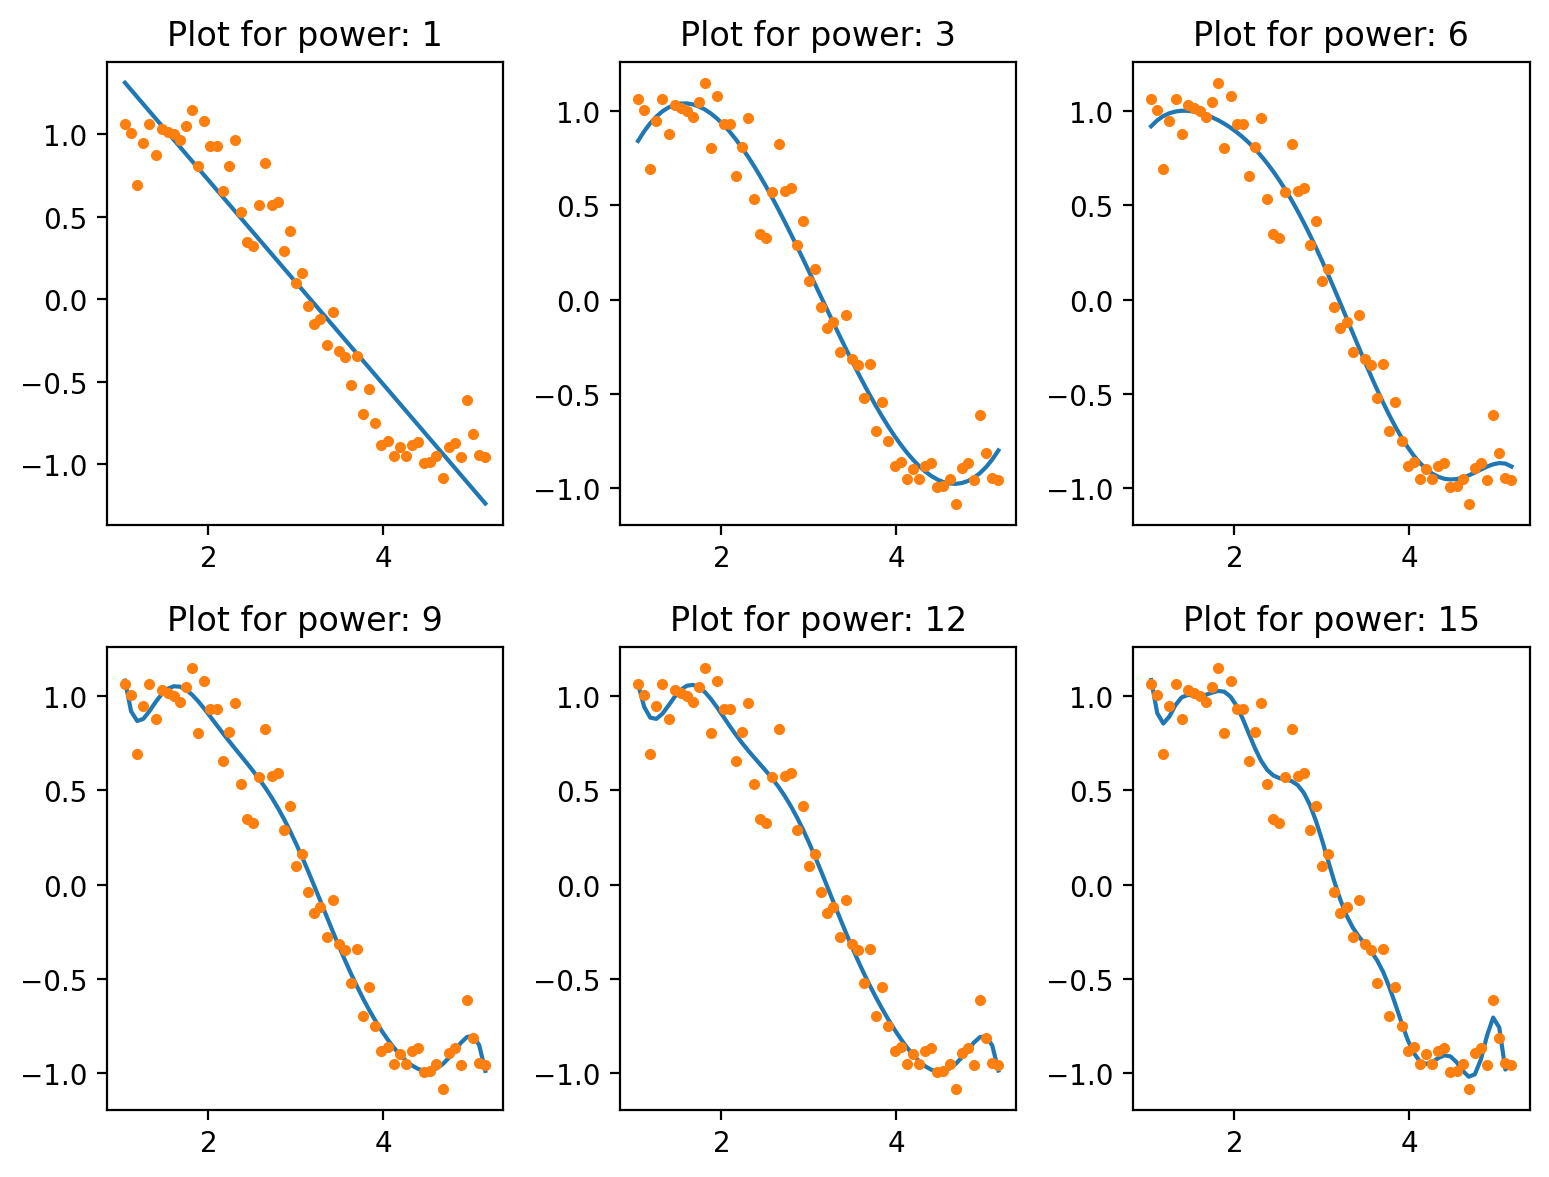

In [84]:
# define the powers for which a plot is required:
models_to_plot = {1:231,3:232,6:233,9:234,12:235,15:236}

#Iterate through all powers and assimilate results
for i in range(1,16):
    coef_matrix_simple.iloc[i-1, 0:i+2] = linear_regression(data, power=i, models_to_plot=models_to_plot)

In [85]:
coef_matrix_simple

,mse,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
model_pow_1,0.054672,0.038032,-0.749085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_2,0.054611,0.038032,-0.704322,-0.045435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_3,0.018389,0.038032,3.665259,-9.802146,5.50628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_4,0.017976,0.038032,2.039542,-4.054606,-1.430933,2.813007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_5,0.016976,0.038032,-6.187537,36.025149,-77.347587,67.648438,-20.7948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_6,0.016501,0.038032,11.505926,-74.063131,209.599315,-314.236679,234.696654,-68.150543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_7,0.015471,0.038032,-67.648136,525.790581,-1790.022779,3337.57283,-3552.3136,2025.054366,-479.106216,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_8,0.015293,0.038032,-165.652786,1401.667375,-5354.169422,11656.18725,-15357.179103,12097.679864,-5233.371141,954.165834,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_9,0.014582,0.038032,-742.966092,7345.942804,-33947.478817,93146.729135,-162957.723538,184016.396992,-130094.966004,52439.962974,-9206.53921,NaN,NaN,NaN,NaN,NaN,NaN
model_pow_10,0.014576,0.038032,-587.740736,5536.760079,-23898.602326,59265.585532,-88055.67644,72820.884991,-20086.179735,-17178.032472,16296.126723,-4113.780695,NaN,NaN,NaN,NaN,NaN


- As the model complexity increases, the models tends to fit even smaller deviations in the training data set, possibly leading to overfitting.
- the size of coefficients increase exponentially with increase in model complexity.
- What does a large coefficient signify? It means that we’re putting a lot of emphasis on that feature, i.e. the particular feature is a good predictor for the outcome. When it becomes too large, the algorithm starts modelling intricate relations to estimate the output and ends up overfitting to the particular training data.

### Ridge

In [86]:
from sklearn.linear_model import Ridge
def ridge_regression(data, predictors, alpha, models_to_plot={}):
    # fit the model
    ridgereg = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    ridgereg.fit(data[predictors], data['y'])
    y_pred = ridgereg.predict(data[predictors])

    # check if a plot is to be made for the entered alpha

    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'], y_pred)
        plt.plot(data['x'], data['y'], '.')
        plt.title('Plot for alpha: %.3g'%alpha)

    #Return the result in pre-defined format
    mse = sum((y_pred-data['y'])**2) / len(data)
    ret = [mse]
    ret.extend([ridgereg[1].intercept_])
    ret.extend(ridgereg[1].coef_)
    return ret

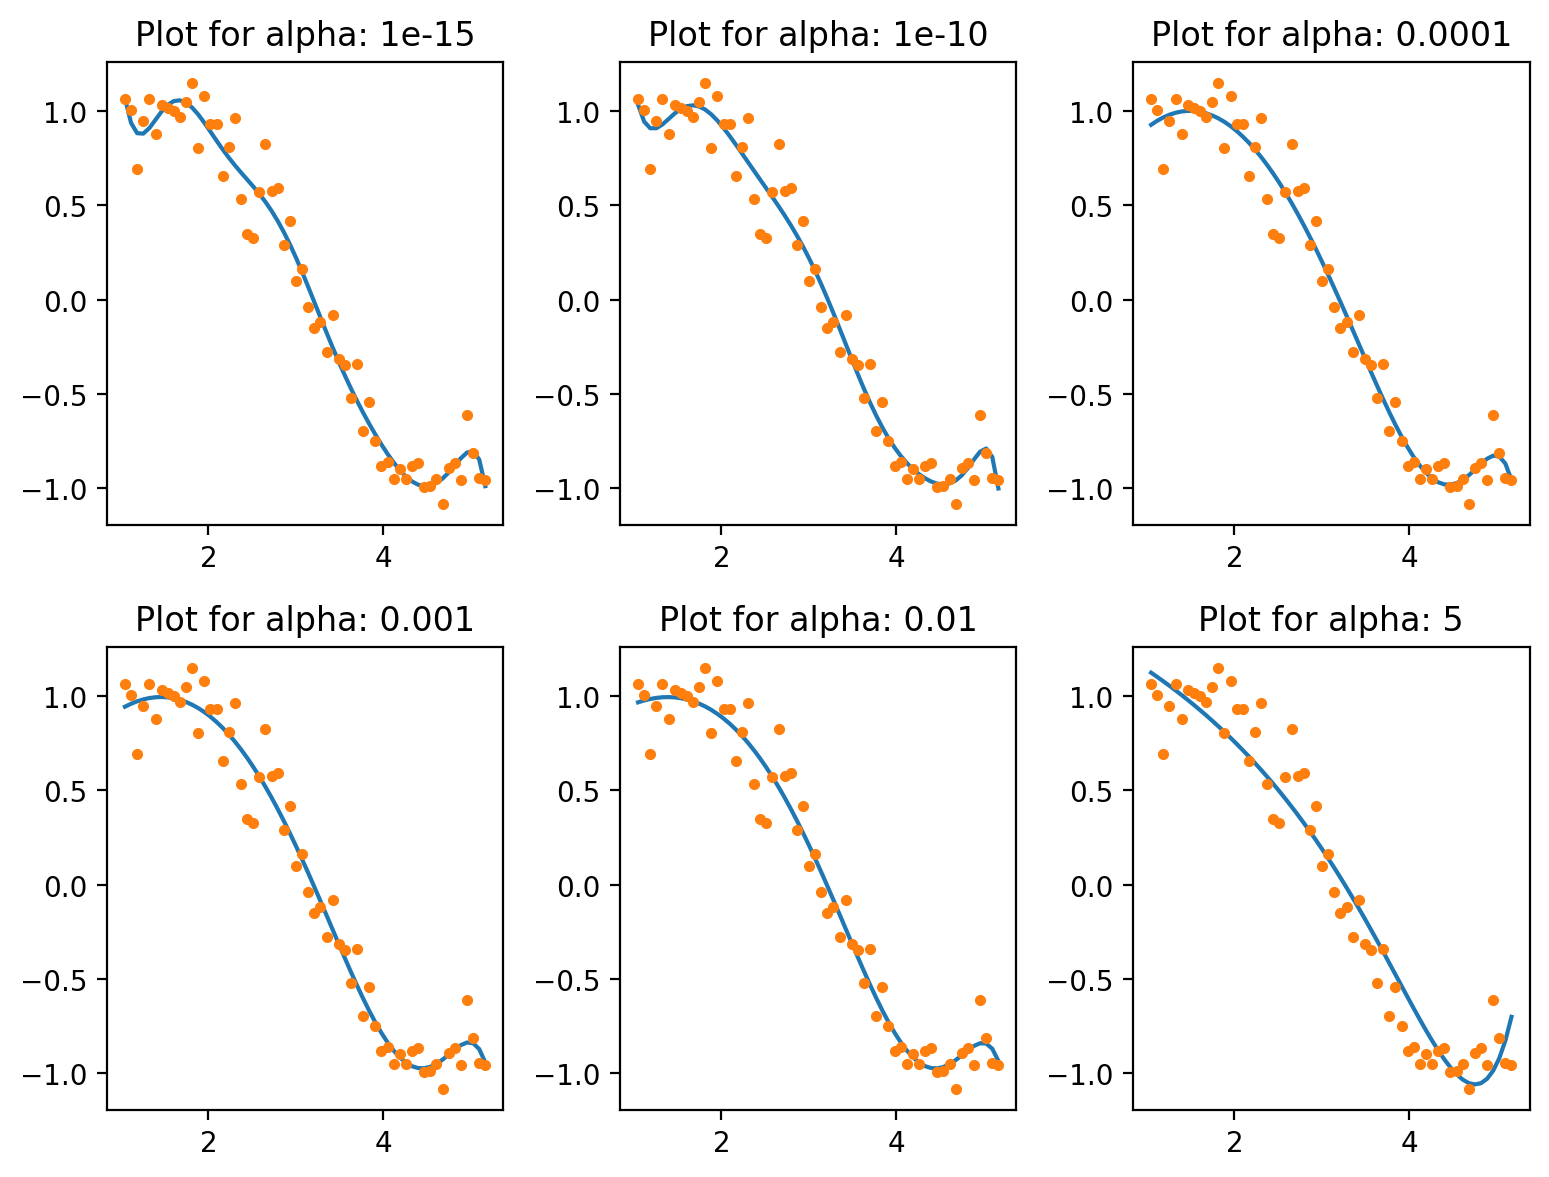

In [87]:
# Initialize predictors to be set of 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

# Set the different values of alpha to be tested
alpha_ridge = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]

# Initialize the dataframe for storing coefficients.
col = ['mse','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_ridge[i] for i in range(0,10)]
coef_matrix_ridge = pd.DataFrame(index=ind, columns=col)

models_to_plot = {1e-15:231, 1e-10:232, 1e-4:233, 1e-3:234, 1e-2:235, 5:236}
for i in range(10):
    coef_matrix_ridge.iloc[i,] = ridge_regression(data, predictors, alpha_ridge[i], models_to_plot)

In [88]:
# Set the display format to be scientific for ease of analysis
pd.options.display.float_format = '{:,.2g}'.format
coef_matrix_ridge

,mse,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.014,0.038,4.8e+02,-7.3e+03,4.8e+04,-1.8e+05,3.8e+05,-4e+05,3.2e+04,3.9e+05,-2.1e+05,-3.2e+05,3.1e+05,2.3e+05,-4.8e+05,2.7e+05,-5.3e+04
alpha_1e-10,0.015,0.038,-1.5e+02,1.1e+03,-3.4e+03,4.5e+03,-1e+03,-3.1e+03,6.2e+02,2.6e+03,5.6e+02,-1.8e+03,-1.4e+03,8.2e+02,1.4e+03,-8.4e+02,27
alpha_1e-08,0.015,0.038,-26,1.7e+02,-4.3e+02,4e+02,1.3e+02,-3e+02,-2e+02,1.5e+02,2.7e+02,62,-2e+02,-2.2e+02,50,3e+02,-1.6e+02
alpha_0.0001,0.016,0.038,1.2,-2.2,-1.5,0.47,1.1,0.52,-0.35,-0.79,-0.59,0.07,0.87,1.4,1.3,0.12,-2.3
alpha_0.001,0.016,0.038,0.9,-1.5,-1.1,-0.24,0.19,0.25,0.18,0.16,0.23,0.35,0.44,0.42,0.21,-0.23,-0.97
alpha_0.01,0.016,0.038,0.6,-0.89,-1,-0.6,-0.16,0.18,0.38,0.47,0.48,0.42,0.3,0.14,-0.07,-0.32,-0.61
alpha_1,0.026,0.038,-0.18,-0.35,-0.33,-0.23,-0.11,-0.011,0.066,0.11,0.13,0.13,0.11,0.076,0.031,-0.021,-0.08
alpha_5,0.032,0.038,-0.27,-0.26,-0.21,-0.15,-0.092,-0.042,-0.0024,0.026,0.044,0.055,0.06,0.06,0.055,0.048,0.039
alpha_10,0.036,0.038,-0.26,-0.24,-0.19,-0.14,-0.09,-0.049,-0.017,0.0079,0.026,0.039,0.048,0.053,0.056,0.056,0.055
alpha_20,0.047,0.038,-0.24,-0.21,-0.17,-0.12,-0.085,-0.053,-0.026,-0.0045,0.012,0.026,0.036,0.043,0.049,0.053,0.055


### Lasso

In [89]:
from sklearn.linear_model import Lasso
def lasso_regression(data, predictors, alpha, models_to_plot={}):
    # fit the model
    lassoreg = make_pipeline(StandardScaler(), Lasso(alpha=alpha, max_iter=100000))
    lassoreg.fit(data[predictors], data['y'])
    y_pred = lassoreg.predict(data[predictors])

    # check if a plot is to be made for the entered alpha
    if alpha in models_to_plot:
        plt.subplot(models_to_plot[alpha])
        plt.tight_layout()
        plt.plot(data['x'],y_pred)
        plt.plot(data['x'],data['y'],'.')
        plt.title('Plot for alpha: %.3g'%alpha)

    #Return the result in pre-defined format
    mse = sum((y_pred-data['y'])**2) / len(data)
    ret = [mse]
    ret.extend([lassoreg[1].intercept_])
    ret.extend(lassoreg[1].coef_)
    return ret

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.784e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.783e-01, tolerance: 3.695e-03
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.774e-01, tolerance: 3.695e

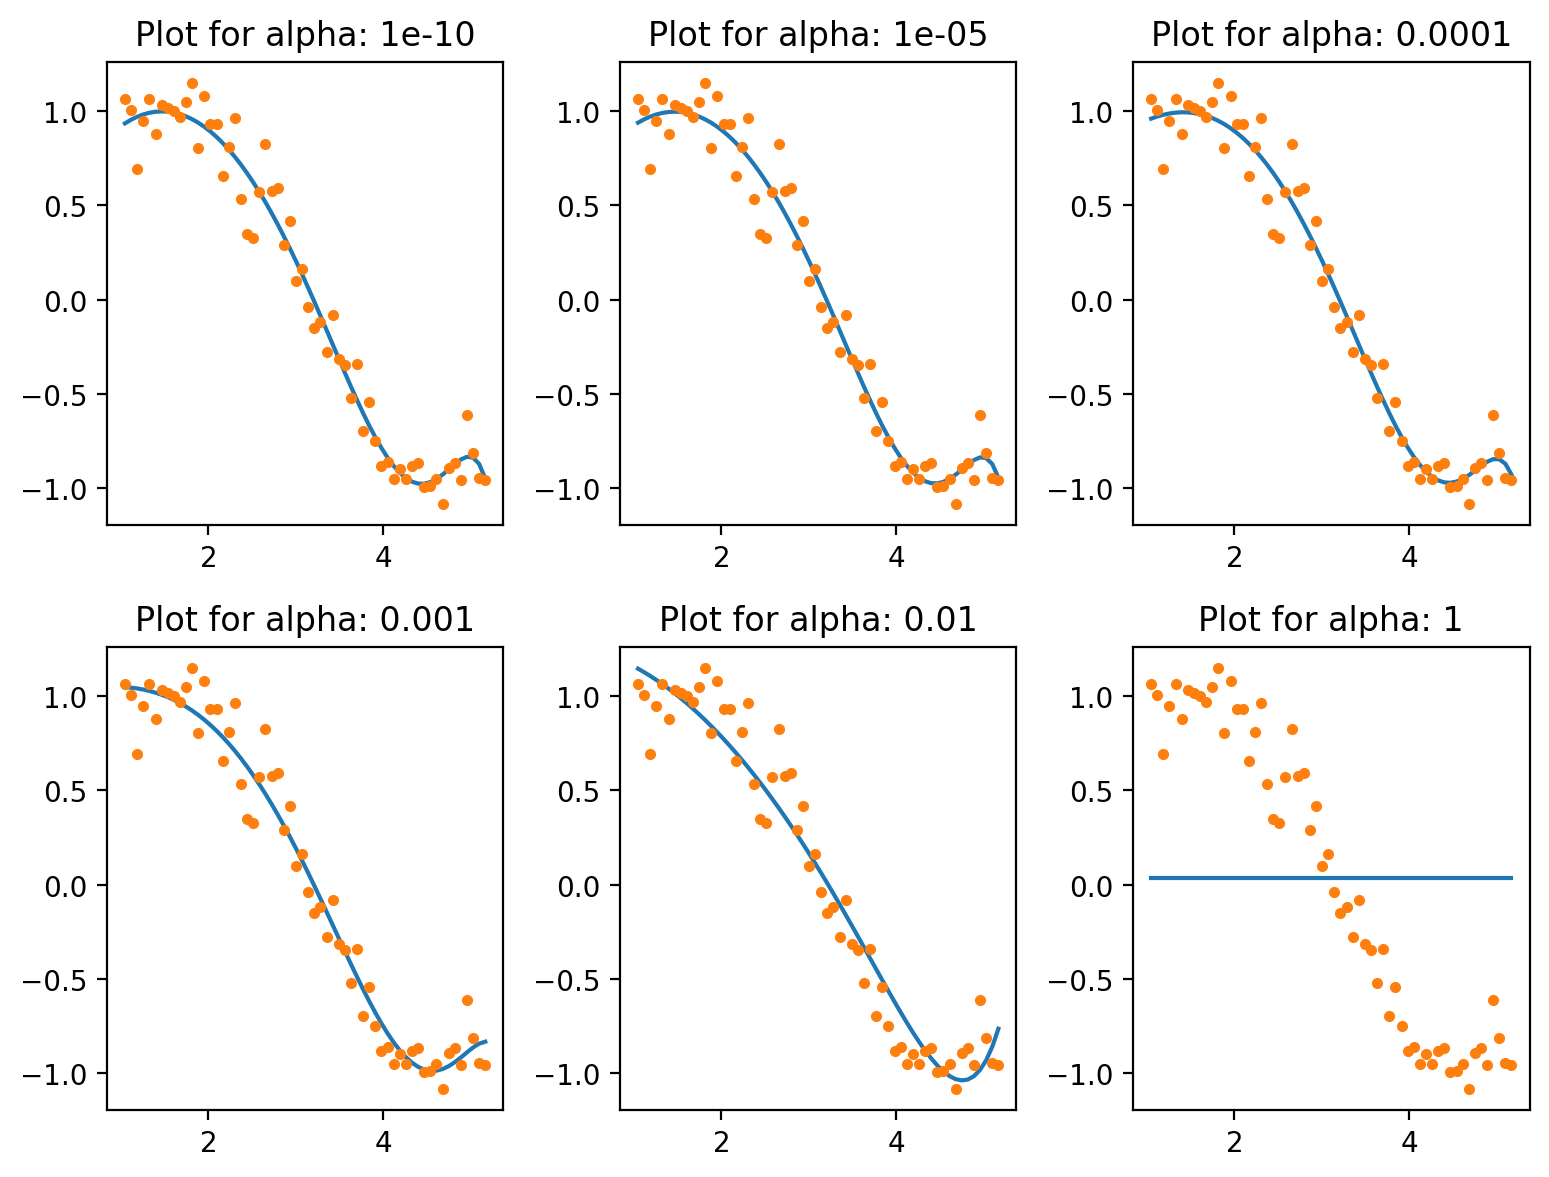

In [90]:
#Initialize predictors to all 15 powers of x
predictors=['x']
predictors.extend(['x_%d'%i for i in range(2,16)])

#Define the alpha values to test
alpha_lasso = [1e-15, 1e-10, 1e-8, 1e-5,1e-4, 1e-3,1e-2, 1, 5, 10]

#Initialize the dataframe to store coefficients
col = ['mse','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,10)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

#Define the models to plot
models_to_plot = {1e-10:231, 1e-5:232,1e-4:233, 1e-3:234, 1e-2:235, 1:236}

#Iterate over the 10 alpha values:
for i in range(10):
    coef_matrix_lasso.iloc[i,] = lasso_regression(data, predictors, alpha_lasso[i], models_to_plot)

In [91]:
coef_matrix_lasso

,mse,intercept,coef_x_1,coef_x_2,coef_x_3,coef_x_4,coef_x_5,coef_x_6,coef_x_7,coef_x_8,coef_x_9,coef_x_10,coef_x_11,coef_x_12,coef_x_13,coef_x_14,coef_x_15
alpha_1e-15,0.016,0.038,1.3,-2.8,0.036,0.33,-0.12,-0.32,-0.16,0.18,0.49,0.65,0.62,0.42,0.072,-0.39,-0.94
alpha_1e-10,0.016,0.038,1.3,-2.8,0.035,0.33,-0.12,-0.32,-0.16,0.18,0.49,0.65,0.62,0.42,0.072,-0.39,-0.94
alpha_1e-08,0.016,0.038,1.3,-2.8,0.035,0.33,-0.12,-0.32,-0.16,0.18,0.49,0.65,0.62,0.42,0.073,-0.39,-0.94
alpha_1e-05,0.016,0.038,1.1,-2.2,-0.43,-0,0,0,0,0,0.64,0.65,0.45,0.13,0,0,-1
alpha_0.0001,0.016,0.038,0.57,-0.5,-1.9,-0,0,0,0,1.2,0.69,0,0,0,0,-0,-0.67
alpha_0.001,0.018,0.038,0.14,-0,-1.8,-0,-0,0,0,1.1,0.28,0,0,0,-0,-0,-0.37
alpha_0.01,0.028,0.038,-0,-0.95,-0,-0,-0,0,0,0,0,0,0.13,0.15,0,0,0
alpha_1,0.62,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_5,0.62,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0
alpha_10,0.62,0.038,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0,-0


In [92]:
coef_matrix_lasso.apply(lambda x: sum(x.values==0), axis=1)

,0
alpha_1e-15,0
alpha_1e-10,0
alpha_1e-08,0
alpha_1e-05,7
alpha_0.0001,9
alpha_0.001,10
alpha_0.01,12
alpha_1,15
alpha_5,15
alpha_10,15


- Conclusion
  - Ridge: It includes all (or none) of the features in the model. Thus, the major advantage of ridge regression is **coefficient shrinkage** and **reducing model complexity**.
  - Lasso: Along with **shrinking coefficients**, lasso performs **feature selection** as well. (Remember the ‘selection‘ in the lasso full-form) As we observed, some of the coefficients become exactly zero, which is equivalent to the particular feature being excluded from the model.

- Typical use cases:
  - Ridge: It is majorly used to **prevent overfitting**. Since it includes all the features, it is not very useful in case of exorbitantly high #features, say in millions, as it will pose computational challenges.
  - Lasso: Since it provides sparse solutions, it is generally **the model of choice** (or some variant of this concept) for modelling cases where the number of features are in millions or more. In such a case, getting a sparse solution is of great computational advantage as the features with zero coefficients can simply be ignored.

# Exercise (test)

In [93]:
from sklearn.linear_model import SGDRegressor, LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures

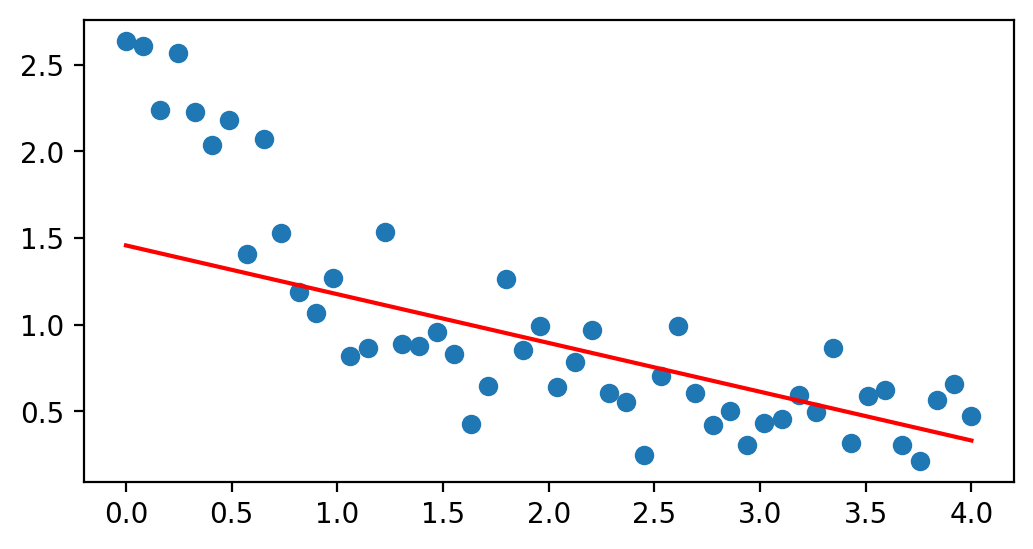

In [94]:
x = np.linspace(0, 4, 50)
y = 2.5 * np.exp(-1.3 * x) + 0.5
y = y + 0.2 * np.random.normal(size=x.size)

lin = SGDRegressor()
lin.fit(x.reshape(-1,1), y)
a, b = lin.coef_, lin.intercept_
xx = np.linspace(0.,4.,50)
yy = a * xx + b
plt.figure(figsize=(6,3))
plt.scatter(x, y)
plt.plot(xx, yy, c='r')

[]

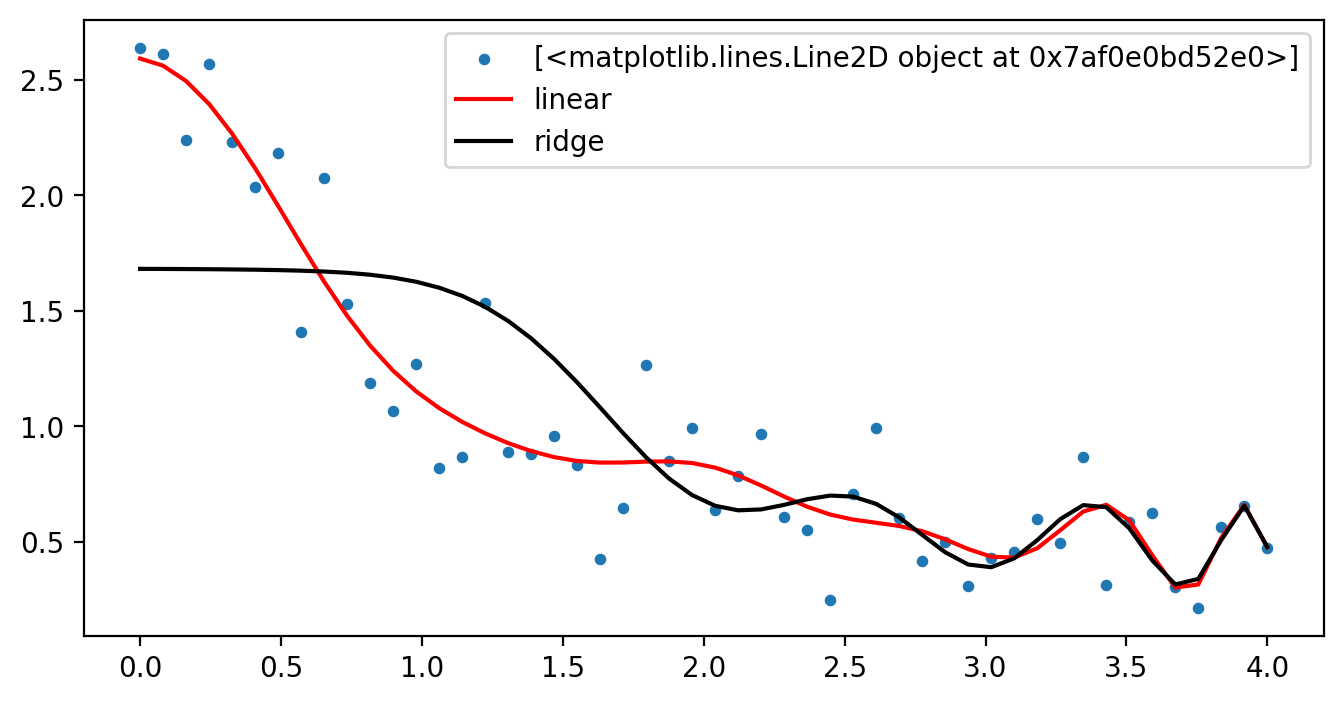

In [95]:
poly_f = PolynomialFeatures(degree = 20, include_bias = False)
x_poly = poly_f.fit_transform(x.reshape(-1,1))

lin = LinearRegression()
lin.fit(x_poly, y)
y_pred_lin = lin.predict(x_poly)

ridge_ = Ridge(alpha=1000)
ridge_.fit(x_poly, y)
y_pred_ridge = ridge_.predict(x_poly)

plt.figure(figsize=(8,4))
plt.scatter(x, y, s = 10)
plt.plot(x, y_pred_lin, c ='r')
plt.plot(x, y_pred_ridge, c ='k')
plt.legend([_,'linear','ridge'])
plt.plot()

- list : append and extend

In [96]:
a = [1,2,3]
a.append([4,5]); a

[1, 2, 3, [4, 5]]

In [97]:
a = [1,2,3]
a.extend([4,5]); a

[1, 2, 3, 4, 5]